In [98]:
## Importing the required libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


In [2]:
tickers=['GOOG','META','NFLX','AAPL','MSFT']
market_ticker='^GSPC'
start_date='2015-01-01'
end_data=datetime.today().strftime("%Y-%m-%d")
annual_rf_rate=0.03 ## Risk free rate of 3%
trading_days=252
daily_rf_rate=(1+annual_rf_rate)**(1/trading_days)-1
print("Daily risk-free rate is approximately", round(daily_rf_rate * 100, 4), "%")

Daily risk-free rate is approximately 0.0117 %


In [3]:
all_tickers=tickers+[market_ticker]
data=yf.download(all_tickers,start=start_date,end=end_data,auto_adjust=True)['Close']

[*********************100%***********************]  6 of 6 completed


In [4]:
data.tail()

Ticker            AAPL        GOOG        META        MSFT        NFLX  \
Date                                                                     
2025-12-01  283.100006  315.119995  640.869995  486.739990  109.129997   
2025-12-02  286.190002  316.019989  647.099976  490.000000  109.349998   
2025-12-03  284.149994  320.619995  639.599976  477.730011  103.959999   
2025-12-04  280.700012  318.390015  661.530029  480.839996  103.220001   
2025-12-05  278.779999  322.089996  673.419983  483.160004  100.239998   

Ticker            ^GSPC  
Date                     
2025-12-01  6812.629883  
2025-12-02  6829.370117  
2025-12-03  6849.720215  
2025-12-04  6857.120117  
2025-12-05  6870.399902

In [5]:
data=data.rename(columns={market_ticker:"MKT"})
data.head()

Ticker           AAPL       GOOG       META       MSFT      NFLX          MKT
Date                                                                         
2015-01-02  24.237553  25.990791  77.969337  39.858448  4.984857  2058.199951
2015-01-05  23.554737  25.448999  76.717064  39.491924  4.731143  2020.579956
2015-01-06  23.556955  24.859165  75.683434  38.912289  4.650143  2002.609985
2015-01-07  23.887276  24.816574  75.683434  39.406696  4.674286  2025.900024
2015-01-08  24.805086  24.894823  77.700996  40.565956  4.778000  2062.139893

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2749 entries, 2015-01-02 to 2025-12-05
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2749 non-null   float64
 1   GOOG    2749 non-null   float64
 2   META    2749 non-null   float64
 3   MSFT    2749 non-null   float64
 4   NFLX    2749 non-null   float64
 5   MKT     2749 non-null   float64
dtypes: float64(6)
memory usage: 150.3 KB


In [7]:
log_returns=np.log(data/data.shift(1)).dropna()

In [8]:
log_returns

Ticker          AAPL      GOOG      META      MSFT      NFLX       MKT
Date                                                                  
2015-01-05 -0.028576 -0.021066 -0.016191 -0.009238 -0.052238 -0.018447
2015-01-06  0.000094 -0.023450 -0.013565 -0.014786 -0.017269 -0.008933
2015-01-07  0.013925 -0.001715  0.000000  0.012626  0.005178  0.011563
2015-01-08  0.037703  0.003148  0.026309  0.028993  0.021946  0.017730
2015-01-09  0.001072 -0.013035 -0.005644 -0.008441 -0.015578 -0.008439
...              ...       ...       ...       ...       ...       ...
2025-12-01  0.015126 -0.015742 -0.010987 -0.010769  0.014305 -0.005338
2025-12-02  0.010856  0.002852  0.009674  0.006675  0.002014  0.002454
2025-12-03 -0.007154  0.014451 -0.011658 -0.025360 -0.050548  0.002975
2025-12-04 -0.012216 -0.006980  0.033712  0.006489 -0.007144  0.001080
2025-12-05 -0.006864  0.011554  0.017814  0.004813 -0.029295  0.001935

[2748 rows x 6 columns]

In [9]:
r_mkt=log_returns['MKT']
r_assets=log_returns[tickers]

In [11]:
rf_series=pd.Series(daily_rf_rate,index=log_returns.index,name="RF")
rf_series

Date
2015-01-05    0.000117
2015-01-06    0.000117
2015-01-07    0.000117
2015-01-08    0.000117
2015-01-09    0.000117
                ...   
2025-12-01    0.000117
2025-12-02    0.000117
2025-12-03    0.000117
2025-12-04    0.000117
2025-12-05    0.000117
Name: RF, Length: 2748, dtype: float64

In [12]:
log_returns

Ticker          AAPL      GOOG      META      MSFT      NFLX       MKT
Date                                                                  
2015-01-05 -0.028576 -0.021066 -0.016191 -0.009238 -0.052238 -0.018447
2015-01-06  0.000094 -0.023450 -0.013565 -0.014786 -0.017269 -0.008933
2015-01-07  0.013925 -0.001715  0.000000  0.012626  0.005178  0.011563
2015-01-08  0.037703  0.003148  0.026309  0.028993  0.021946  0.017730
2015-01-09  0.001072 -0.013035 -0.005644 -0.008441 -0.015578 -0.008439
...              ...       ...       ...       ...       ...       ...
2025-12-01  0.015126 -0.015742 -0.010987 -0.010769  0.014305 -0.005338
2025-12-02  0.010856  0.002852  0.009674  0.006675  0.002014  0.002454
2025-12-03 -0.007154  0.014451 -0.011658 -0.025360 -0.050548  0.002975
2025-12-04 -0.012216 -0.006980  0.033712  0.006489 -0.007144  0.001080
2025-12-05 -0.006864  0.011554  0.017814  0.004813 -0.029295  0.001935

[2748 rows x 6 columns]

In [13]:
log_returns['RF']=rf_series
log_returns.head()

Ticker          AAPL      GOOG      META      MSFT      NFLX       MKT  \
Date                                                                     
2015-01-05 -0.028576 -0.021066 -0.016191 -0.009238 -0.052238 -0.018447   
2015-01-06  0.000094 -0.023450 -0.013565 -0.014786 -0.017269 -0.008933   
2015-01-07  0.013925 -0.001715  0.000000  0.012626  0.005178  0.011563   
2015-01-08  0.037703  0.003148  0.026309  0.028993  0.021946  0.017730   
2015-01-09  0.001072 -0.013035 -0.005644 -0.008441 -0.015578 -0.008439   

Ticker            RF  
Date                  
2015-01-05  0.000117  
2015-01-06  0.000117  
2015-01-07  0.000117  
2015-01-08  0.000117  
2015-01-09  0.000117

In [14]:
r_assets

Ticker          GOOG      META      NFLX      AAPL      MSFT
Date                                                        
2015-01-05 -0.021066 -0.016191 -0.052238 -0.028576 -0.009238
2015-01-06 -0.023450 -0.013565 -0.017269  0.000094 -0.014786
2015-01-07 -0.001715  0.000000  0.005178  0.013925  0.012626
2015-01-08  0.003148  0.026309  0.021946  0.037703  0.028993
2015-01-09 -0.013035 -0.005644 -0.015578  0.001072 -0.008441
...              ...       ...       ...       ...       ...
2025-12-01 -0.015742 -0.010987  0.014305  0.015126 -0.010769
2025-12-02  0.002852  0.009674  0.002014  0.010856  0.006675
2025-12-03  0.014451 -0.011658 -0.050548 -0.007154 -0.025360
2025-12-04 -0.006980  0.033712 -0.007144 -0.012216  0.006489
2025-12-05  0.011554  0.017814 -0.029295 -0.006864  0.004813

[2748 rows x 5 columns]

In [15]:
r_mkt

Date
2015-01-05   -0.018447
2015-01-06   -0.008933
2015-01-07    0.011563
2015-01-08    0.017730
2015-01-09   -0.008439
                ...   
2025-12-01   -0.005338
2025-12-02    0.002454
2025-12-03    0.002975
2025-12-04    0.001080
2025-12-05    0.001935
Name: MKT, Length: 2748, dtype: float64

In [16]:
rf_series

Date
2015-01-05    0.000117
2015-01-06    0.000117
2015-01-07    0.000117
2015-01-08    0.000117
2015-01-09    0.000117
                ...   
2025-12-01    0.000117
2025-12-02    0.000117
2025-12-03    0.000117
2025-12-04    0.000117
2025-12-05    0.000117
Name: RF, Length: 2748, dtype: float64

In [17]:
excess_mkt=r_mkt-rf_series
excess_mkt

Date
2015-01-05   -0.018565
2015-01-06   -0.009051
2015-01-07    0.011445
2015-01-08    0.017613
2015-01-09   -0.008557
                ...   
2025-12-01   -0.005455
2025-12-02    0.002337
2025-12-03    0.002858
2025-12-04    0.000962
2025-12-05    0.001817
Length: 2748, dtype: float64

In [18]:
excess_mkt.name='R_MKT_EXCESS'
excess_mkt

Date
2015-01-05   -0.018565
2015-01-06   -0.009051
2015-01-07    0.011445
2015-01-08    0.017613
2015-01-09   -0.008557
                ...   
2025-12-01   -0.005455
2025-12-02    0.002337
2025-12-03    0.002858
2025-12-04    0.000962
2025-12-05    0.001817
Name: R_MKT_EXCESS, Length: 2748, dtype: float64

In [19]:
excess_assets=r_assets.sub(rf_series,axis=0)
excess_assets

Ticker          GOOG      META      NFLX      AAPL      MSFT
Date                                                        
2015-01-05 -0.021183 -0.016309 -0.052355 -0.028694 -0.009355
2015-01-06 -0.023567 -0.013682 -0.017386 -0.000023 -0.014903
2015-01-07 -0.001832 -0.000117  0.005061  0.013807  0.012508
2015-01-08  0.003031  0.026191  0.021828  0.037585  0.028876
2015-01-09 -0.013153 -0.005761 -0.015696  0.000955 -0.008558
...              ...       ...       ...       ...       ...
2025-12-01 -0.015860 -0.011104  0.014188  0.015009 -0.010886
2025-12-02  0.002735  0.009557  0.001897  0.010738  0.006558
2025-12-03  0.014334 -0.011775 -0.050665 -0.007271 -0.025477
2025-12-04 -0.007097  0.033595 -0.007261 -0.012333  0.006372
2025-12-05  0.011437  0.017696 -0.029413 -0.006981  0.004696

[2748 rows x 5 columns]

In [21]:
### Modelling the excess returns
results=[]
for ticker in tickers:
  y=excess_assets[ticker]
  X=excess_mkt
  X=sm.add_constant(X)
  model=sm.OLS(y,X).fit()

  alpha=model.params["const"]
  beta=model.params[excess_mkt.name]

  alpha_annual=alpha*trading_days

  results.append({
      "Ticker":ticker,
      "Alpha Daily" : alpha,
      "Alpha Annual" : alpha_annual,
      "Beta" : beta,
      "R-Squared" : model.rsquared,
      "Model":model
  })

results_df=pd.DataFrame(results).set_index("Ticker")
results_df

Alpha Daily  Alpha Annual      Beta  R-Squared  \
Ticker                                                   
GOOG       0.000434      0.109299  1.135695   0.503810   
META       0.000253      0.063639  1.290698   0.374910   
NFLX       0.000608      0.153179  1.142001   0.224045   
AAPL       0.000386      0.097165  1.201091   0.559509   
MSFT       0.000410      0.103362  1.184002   0.626710   

                                                    Model  
Ticker                                                     
GOOG    <statsmodels.regression.linear_model.Regressio...  
META    <statsmodels.regression.linear_model.Regressio...  
NFLX    <statsmodels.regression.linear_model.Regressio...  
AAPL    <statsmodels.regression.linear_model.Regressio...  
MSFT    <statsmodels.regression.linear_model.Regressio...

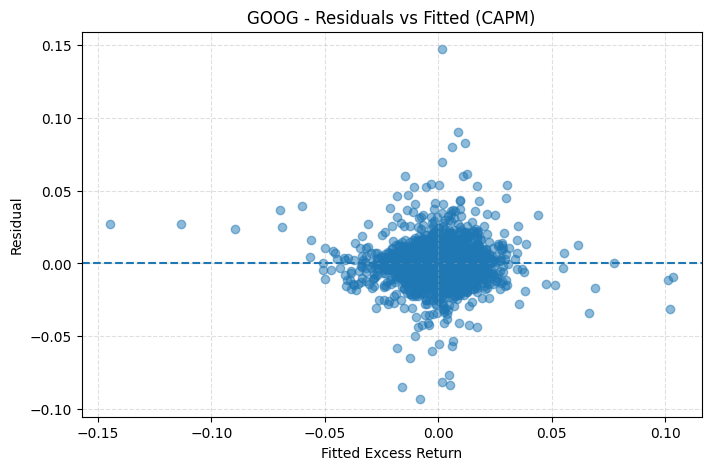


===== OLS Summary for GOOG =====
                            OLS Regression Results                            
Dep. Variable:                   GOOG   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     2788.
Date:                Mon, 08 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:45:08   Log-Likelihood:                 8082.8
No. Observations:                2748   AIC:                        -1.616e+04
Df Residuals:                    2746   BIC:                        -1.615e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         

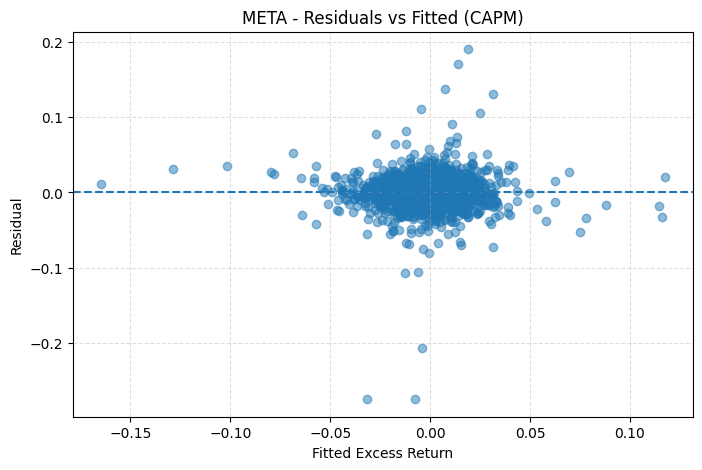


===== OLS Summary for META =====
                            OLS Regression Results                            
Dep. Variable:                   META   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     1647.
Date:                Mon, 08 Dec 2025   Prob (F-statistic):          1.68e-282
Time:                        12:45:08   Log-Likelihood:                 7007.8
No. Observations:                2748   AIC:                        -1.401e+04
Df Residuals:                    2746   BIC:                        -1.400e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         

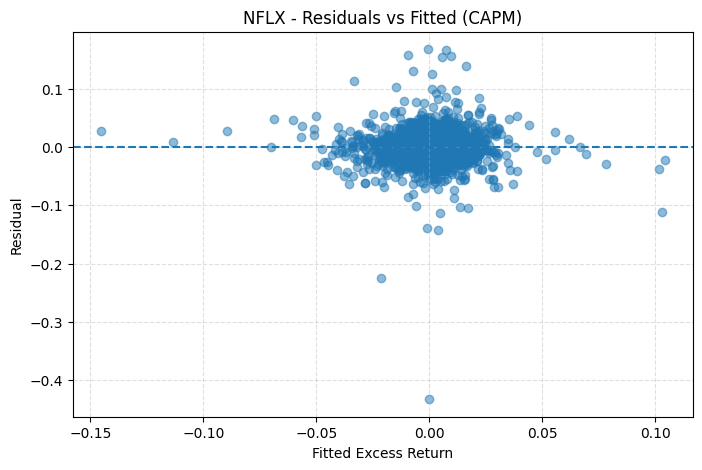


===== OLS Summary for NFLX =====
                            OLS Regression Results                            
Dep. Variable:                   NFLX   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     792.9
Date:                Mon, 08 Dec 2025   Prob (F-statistic):          1.79e-153
Time:                        12:45:09   Log-Likelihood:                 6339.8
No. Observations:                2748   AIC:                        -1.268e+04
Df Residuals:                    2746   BIC:                        -1.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         

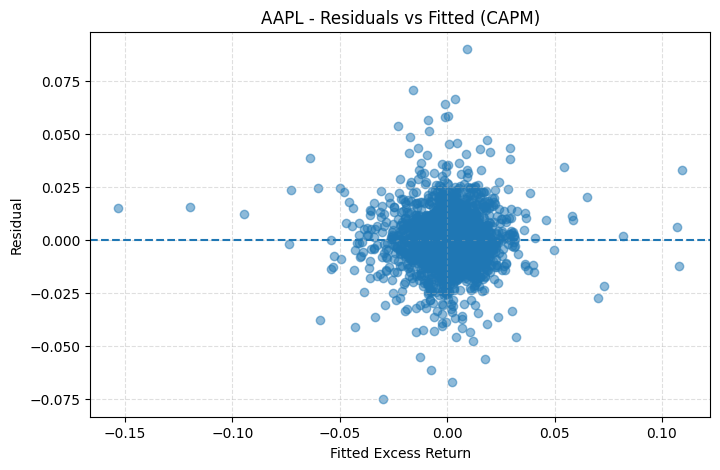


===== OLS Summary for AAPL =====
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     3488.
Date:                Mon, 08 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:45:09   Log-Likelihood:                 8236.6
No. Observations:                2748   AIC:                        -1.647e+04
Df Residuals:                    2746   BIC:                        -1.646e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         

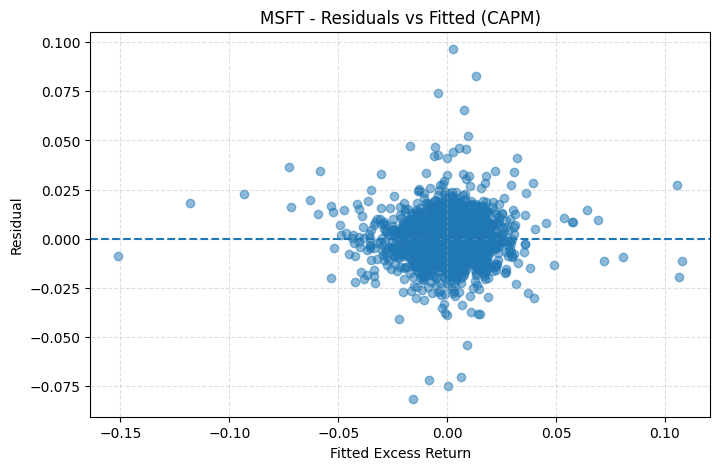


===== OLS Summary for MSFT =====
                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     4610.
Date:                Mon, 08 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:45:10   Log-Likelihood:                 8659.3
No. Observations:                2748   AIC:                        -1.731e+04
Df Residuals:                    2746   BIC:                        -1.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         

In [22]:
###Plotting Residuals
for ticker in tickers:
    model = results_df.loc[ticker, "Model"]

    fitted_vals = model.fittedvalues
    residuals = model.resid

    # Plot residuals
    plt.figure(figsize=(8, 5))
    plt.scatter(fitted_vals, residuals, alpha=0.5)
    plt.axhline(0, linestyle="--")
    plt.xlabel("Fitted Excess Return")
    plt.ylabel("Residual")
    plt.title(f"{ticker} - Residuals vs Fitted (CAPM)")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.show()

    # Print OLS summary
    print(f"\n===== OLS Summary for {ticker} =====")
    print(model.summary())
    print("\n\n")


In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     4610.
Date:                Mon, 08 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:46:32   Log-Likelihood:                 8659.3
No. Observations:                2748   AIC:                        -1.731e+04
Df Residuals:                    2746   BIC:                        -1.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      2.074      0.038    2.24e-05       0.001
R_MKT_EXCESS     1.1840      0.017     67.899      0.000       1.150       1.218
==============================================================================
Omnibus:                      562.284   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14155.950
Skew:                           0.316   Prob(JB):                         0.00
Kurtosis:                      14.101   Cond. No.                         88.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
mean_daily_mkt = r_mkt.mean()
mean_daily_assets = r_assets.mean()

annual_mkt_return = mean_daily_mkt * trading_days
annual_asset_returns = mean_daily_assets * trading_days

mkt_risk_premium = annual_mkt_return - annual_rf_rate

In [26]:
capm_expected_returns = {}
alphas_annual = {}
for ticker in tickers:
    beta = results_df.loc[ticker, "Beta"]
    capm_ret = annual_rf_rate + beta * mkt_risk_premium
    capm_expected_returns[ticker] = capm_ret
    alphas_annual[ticker] = annual_asset_returns[ticker] - capm_ret

capm_df = pd.DataFrame({
    "Realized_annual_return": annual_asset_returns,
    "CAPM_expected_return": pd.Series(capm_expected_returns),
    "Annual_alpha_from_CAPM": pd.Series(alphas_annual),
    "Beta": results_df["Beta"],
    "R2": results_df["R-Squared"]
})
capm_df


Realized_annual_return  CAPM_expected_return  Annual_alpha_from_CAPM  \
GOOG                0.230825              0.121467                0.109358   
META                0.197717              0.133950                0.063767   
NFLX                0.275216              0.121974                0.153241   
AAPL                0.223987              0.126733                0.097253   
MSFT                0.228800              0.125357                0.103443   

          Beta        R2  
GOOG  1.135695  0.503810  
META  1.290698  0.374910  
NFLX  1.142001  0.224045  
AAPL  1.201091  0.559509  
MSFT  1.184002  0.626710

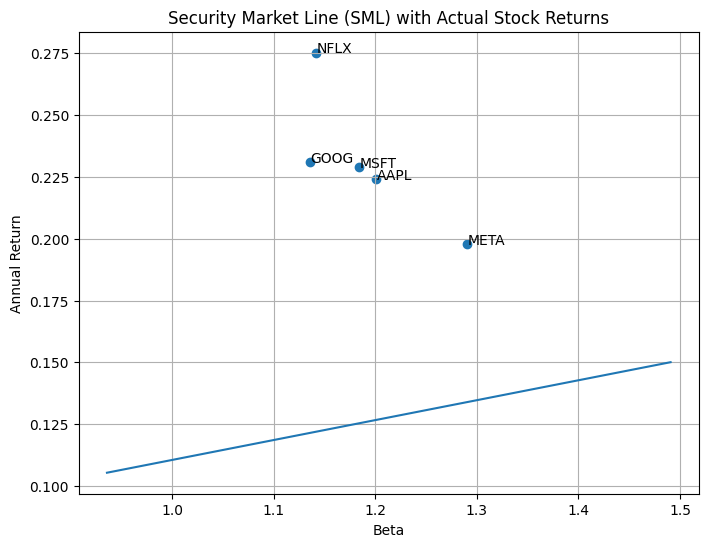

In [27]:
betas = capm_df["Beta"]
realized = capm_df["Realized_annual_return"]

beta_min, beta_max = betas.min(), betas.max()
beta_grid = np.linspace(beta_min - 0.2, beta_max + 0.2, 50)

sml_line = annual_rf_rate + beta_grid * mkt_risk_premium

plt.figure(figsize=(8, 6))
# Scatter actual points
plt.scatter(betas, realized)

# SML line
plt.plot(beta_grid, sml_line)

for ticker in tickers:
    plt.annotate(ticker, (betas[ticker], realized[ticker]))

plt.xlabel("Beta")
plt.ylabel("Annual Return")
plt.title("Security Market Line (SML) with Actual Stock Returns")
plt.grid(True)
plt.show()


In [28]:
window = 252
rolling_betas = pd.DataFrame(index=log_returns.index, columns=tickers)

for ticker in tickers:
    cov = r_assets[ticker].rolling(window).cov(r_mkt)
    var = r_mkt.rolling(window).var()
    rolling_betas[ticker] = cov / var

rolling_betas.tail()

GOOG      META      NFLX      AAPL      MSFT
Date                                                        
2025-12-01  1.069922  1.423687  0.901472  1.274409  0.923089
2025-12-02  1.070234  1.423803  0.902461  1.275333  0.922310
2025-12-03  1.072297  1.422537  0.897964  1.274145  0.920942
2025-12-04  1.071587  1.421503  0.897286  1.273576  0.920191
2025-12-05  1.071890  1.422172  0.896036  1.273218  0.920313

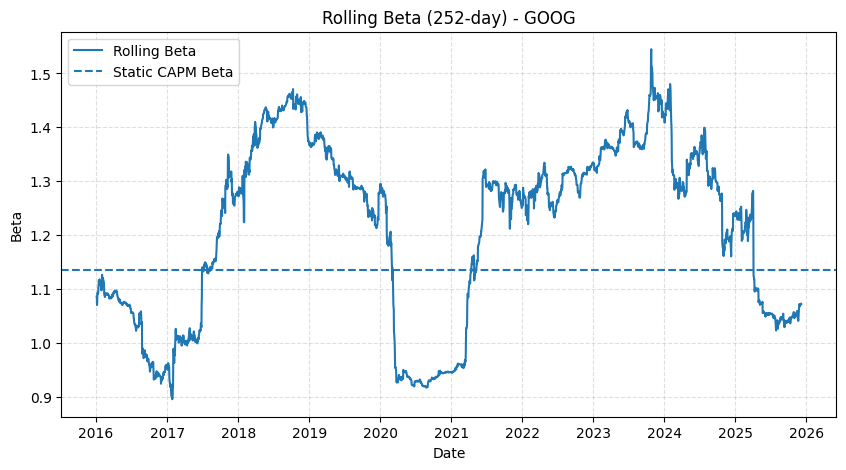

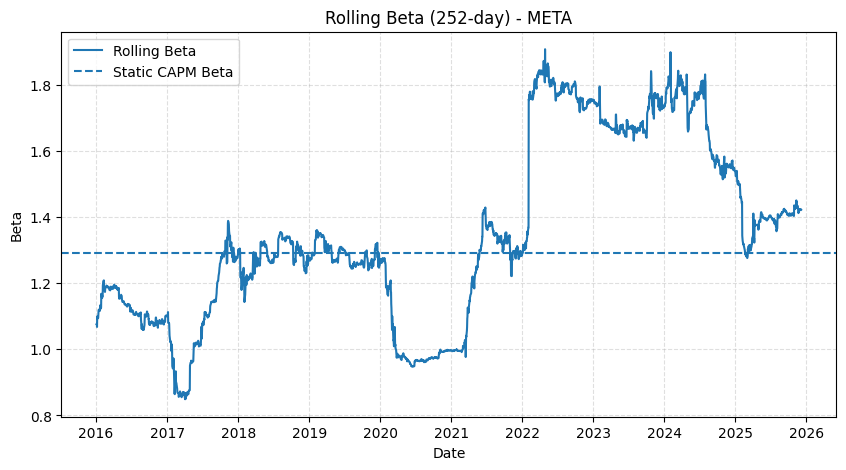

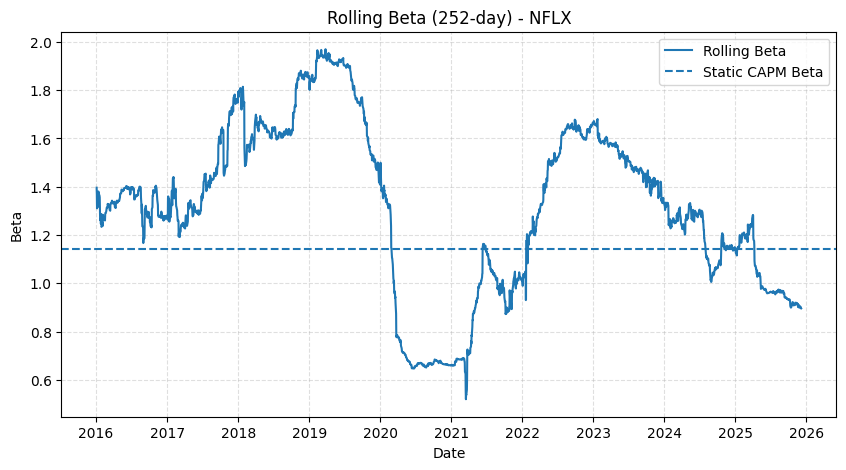

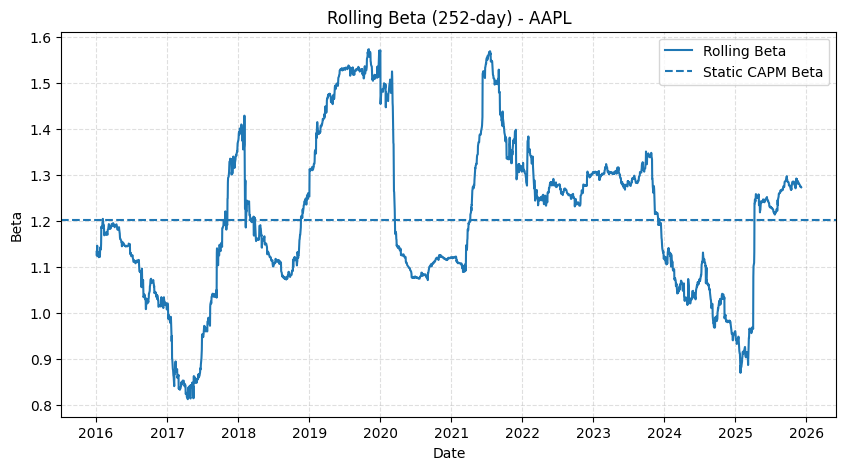

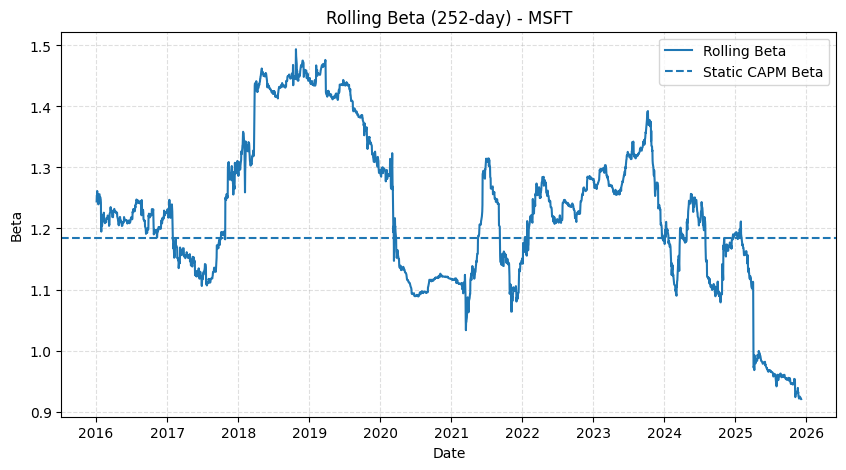

In [29]:
for ticker in tickers:
    plt.figure(figsize=(10, 5))

    plt.plot(rolling_betas[ticker], label="Rolling Beta")
    plt.axhline(results_df.loc[ticker, "Beta"], linestyle="--", label="Static CAPM Beta")

    plt.title(f"Rolling Beta ({window}-day) - {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Beta")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.show()


In [30]:
# %% [markdown]
# # Rolling Alpha (252-day window)

import statsmodels.api as sm

window = 252  # 1-year window
rolling_alpha = pd.DataFrame(index=excess_mkt.index, columns=tickers)

for ticker in tickers:
    for end in range(window, len(excess_mkt)):
        start = end - window

        y = excess_assets[ticker].iloc[start:end]
        X = sm.add_constant(excess_mkt.iloc[start:end])

        model = sm.OLS(y, X).fit()

        rolling_alpha.loc[excess_mkt.index[end], ticker] = model.params["const"]

rolling_alpha = rolling_alpha.dropna()
rolling_alpha.tail()


GOOG      META      NFLX      AAPL      MSFT
Date                                                        
2025-12-01   0.00198 -0.000155  0.000369  0.000084  0.000166
2025-12-02  0.001936 -0.000195  0.000434  0.000164  0.000078
2025-12-03  0.001916 -0.000162  0.000398  0.000177  0.000129
2025-12-04  0.001991 -0.000228  0.000166  0.000122  0.000034
2025-12-05  0.001912 -0.000212  0.000094  0.000043 -0.000005

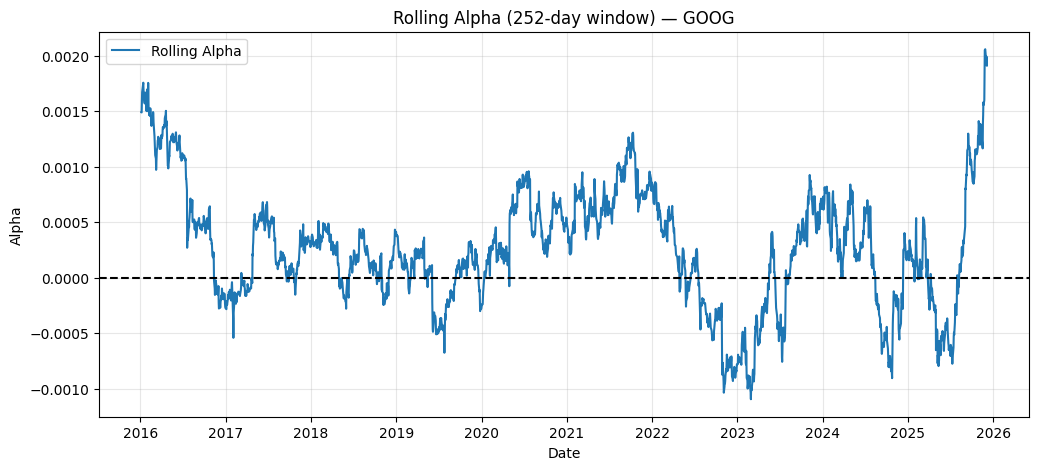

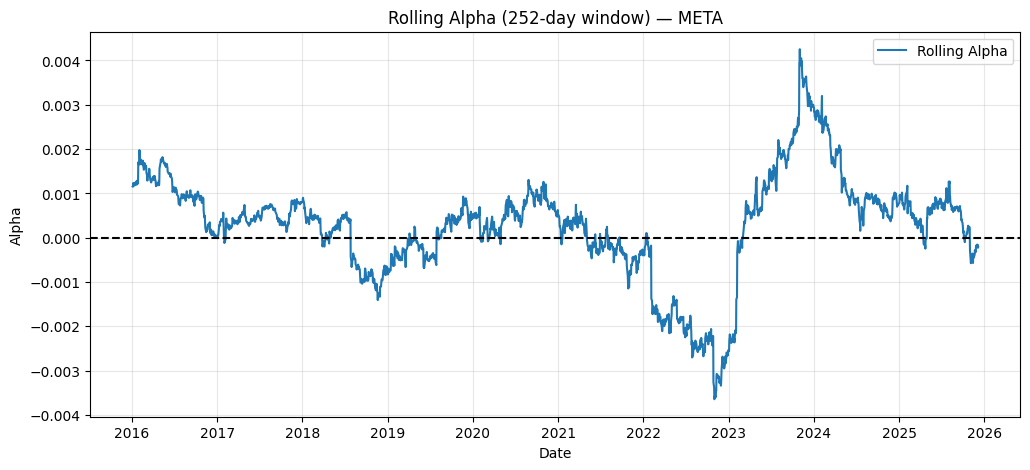

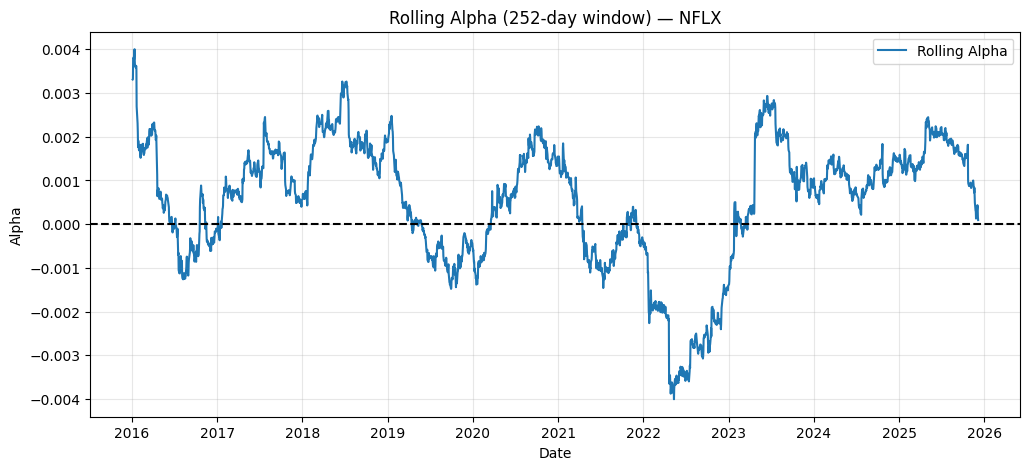

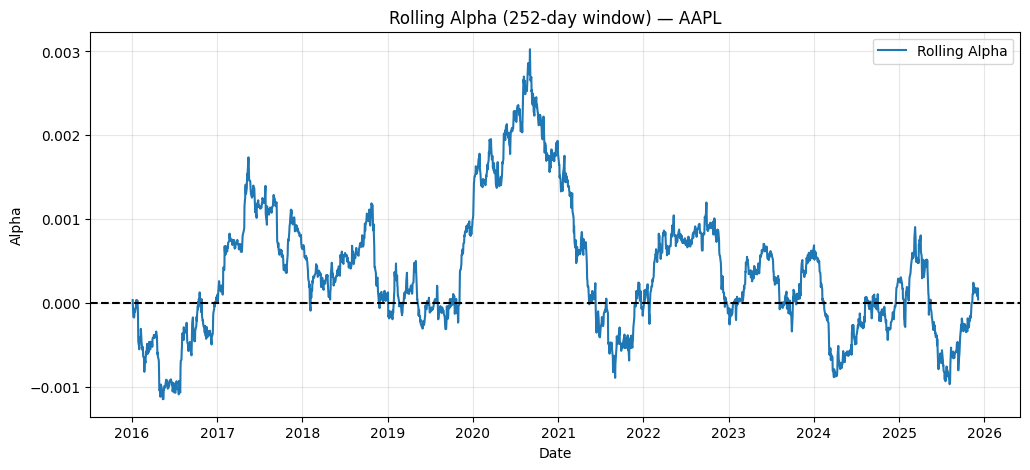

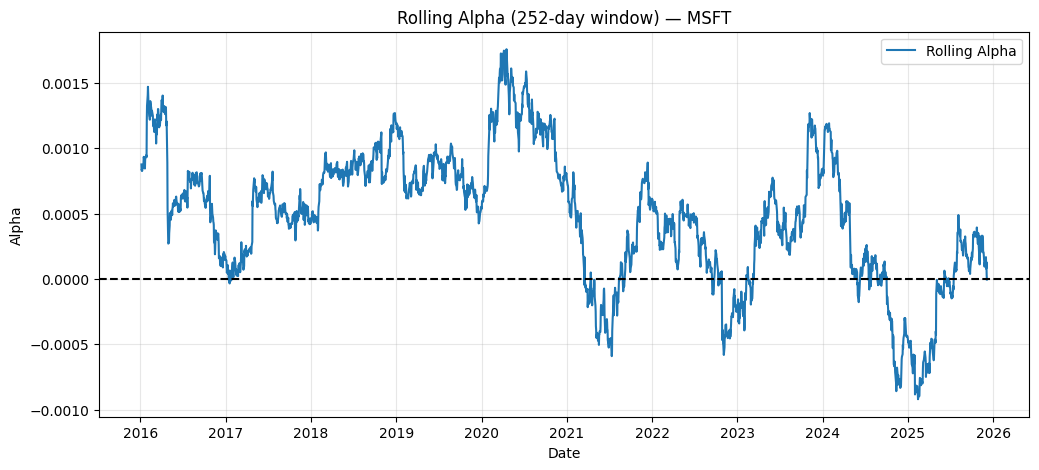

In [31]:
# %% [markdown]
# # Rolling Alpha Visualization

for ticker in tickers:
    plt.figure(figsize=(12,5))
    plt.plot(rolling_alpha[ticker], label="Rolling Alpha")
    plt.axhline(0, linestyle="--", color="black")
    plt.title(f"Rolling Alpha (252-day window) — {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Alpha")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()


Additional Analysis


In [32]:
downside_betas = {}
down_days = log_returns[log_returns["MKT"] < 0]

for ticker in tickers:
    r_i = down_days[ticker]
    r_m = down_days["MKT"]

    cov = r_i.cov(r_m)
    var = r_m.var()

    downside_beta = cov / var
    downside_betas[ticker] = downside_beta

downside_beta_df = pd.DataFrame.from_dict(downside_betas, orient='index', columns=["Downside_Beta"])
downside_beta_df


Downside_Beta
GOOG       1.080635
META       1.260671
NFLX       1.116971
AAPL       1.159860
MSFT       1.134560

In [33]:
upside_betas = {}
up_days = log_returns[log_returns["MKT"] > 0]

for ticker in tickers:
    r_i = up_days[ticker]
    r_m = up_days["MKT"]

    cov = r_i.cov(r_m)
    var = r_m.var()

    up_beta = cov / var
    upside_betas[ticker] = up_beta

upside_beta_df = pd.DataFrame.from_dict(upside_betas, orient='index', columns=["Upside_Beta"])
upside_beta_df


Upside_Beta
GOOG     1.116527
META     1.258487
NFLX     0.962341
AAPL     1.238450
MSFT     1.216355

In [34]:
beta_all = pd.concat([
    results_df["Beta"],
    downside_beta_df["Downside_Beta"],
    upside_beta_df["Upside_Beta"]
], axis=1)

beta_all.columns = ["CAPM_Beta", "Downside_Beta", "Upside_Beta"]
beta_all


CAPM_Beta  Downside_Beta  Upside_Beta
GOOG   1.135695       1.080635     1.116527
META   1.290698       1.260671     1.258487
NFLX   1.142001       1.116971     0.962341
AAPL   1.201091       1.159860     1.238450
MSFT   1.184002       1.134560     1.216355

<Figure size 1000x600 with 0 Axes>

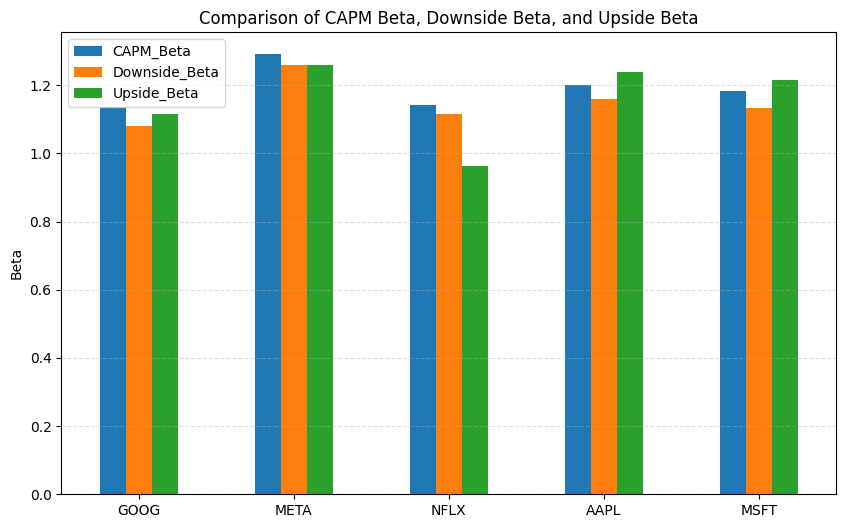

In [35]:
plt.figure(figsize=(10, 6))

beta_all.plot(kind="bar", figsize=(10,6))
plt.title("Comparison of CAPM Beta, Downside Beta, and Upside Beta")
plt.ylabel("Beta")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.xticks(rotation=0)
plt.show()


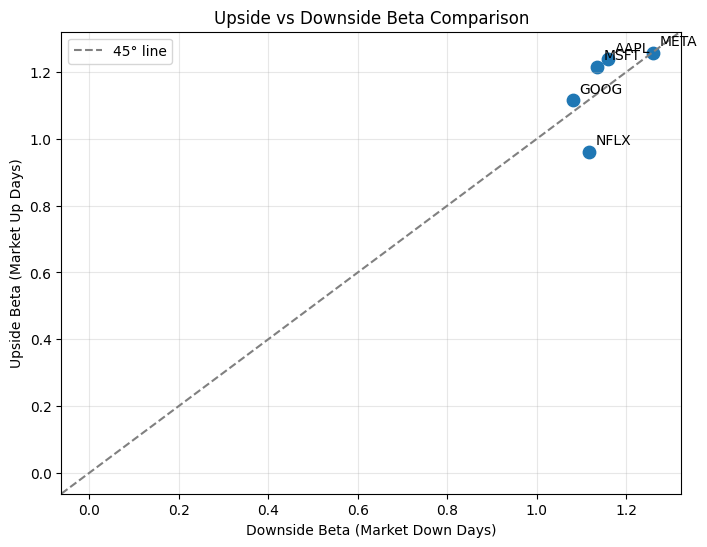

In [36]:
plt.figure(figsize=(8,6))

plt.scatter(beta_all["Downside_Beta"], beta_all["Upside_Beta"], s=80)

for ticker in tickers:
    plt.annotate(ticker,
                 (beta_all.loc[ticker, "Downside_Beta"],
                  beta_all.loc[ticker, "Upside_Beta"]),
                 textcoords="offset points",
                 xytext=(5,5))

# 45-degree reference line
plt.axline((0,0), (1,1), color="gray", linestyle="--", label="45° line")

plt.xlabel("Downside Beta (Market Down Days)")
plt.ylabel("Upside Beta (Market Up Days)")
plt.title("Upside vs Downside Beta Comparison")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [37]:
ma200 = data["MKT"].rolling(200).mean()

regime_df = pd.DataFrame(index=data.index)
regime_df["Price"] = data["MKT"]
regime_df["MA200"] = ma200

regime_df["Pct_Diff"] = (regime_df["Price"] - regime_df["MA200"]) / regime_df["MA200"]


regime_df["Regime"] = None


# Sideways: |Pct_Diff| <= 2%
sideways_band = 0.02

regime_df.loc[regime_df["Pct_Diff"].abs() <= sideways_band, "Regime"] = "Sideways"

# Bull: Price > MA200 AND outside the sideways zone
regime_df.loc[(regime_df["Price"] > regime_df["MA200"]) &
              (regime_df["Pct_Diff"] > sideways_band), "Regime"] = "Bull"

# Bear: Price < MA200 AND outside the sideways zone
regime_df.loc[(regime_df["Price"] < regime_df["MA200"]) &
              (regime_df["Pct_Diff"] < -sideways_band), "Regime"] = "Bear"


regime_df = regime_df.dropna(subset=["MA200"])

regime_df.tail()


Price        MA200  Pct_Diff Regime
Date                                                 
2025-12-01  6812.629883  6180.833438  0.102219   Bull
2025-12-02  6829.370117  6184.407139  0.104289   Bull
2025-12-03  6849.720215  6188.007839  0.106935   Bull
2025-12-04  6857.120117  6191.572690  0.107492   Bull
2025-12-05  6870.399902  6195.337090  0.108963   Bull

In [38]:
log_returns_regime = log_returns.merge(regime_df["Regime"], left_index=True, right_index=True)
log_returns_regime.head()


AAPL      GOOG      META      MSFT      NFLX       MKT  \
Date                                                                     
2015-10-16 -0.007358  0.000695  0.016331  0.010580 -0.020992  0.004560   
2015-10-19  0.006195  0.005872  0.009489  0.002313  0.026910  0.000271   
2015-10-20  0.018093 -0.024037 -0.015041  0.003145 -0.026910 -0.001422   
2015-10-21 -0.000088 -0.011865  0.001134 -0.012004 -0.010460 -0.005842   
2015-10-22  0.015180  0.014185  0.026020  0.017432 -0.006555  0.016491   

                  RF    Regime  
Date                            
2015-10-16  0.000117  Sideways  
2015-10-19  0.000117  Sideways  
2015-10-20  0.000117  Sideways  
2015-10-21  0.000117  Sideways  
2015-10-22  0.000117  Sideways

In [39]:
bull_data = log_returns_regime[log_returns_regime["Regime"] == "Bull"]
bear_data = log_returns_regime[log_returns_regime["Regime"] == "Bear"]
sideways_data = log_returns_regime[log_returns_regime["Regime"] == "Sideways"]


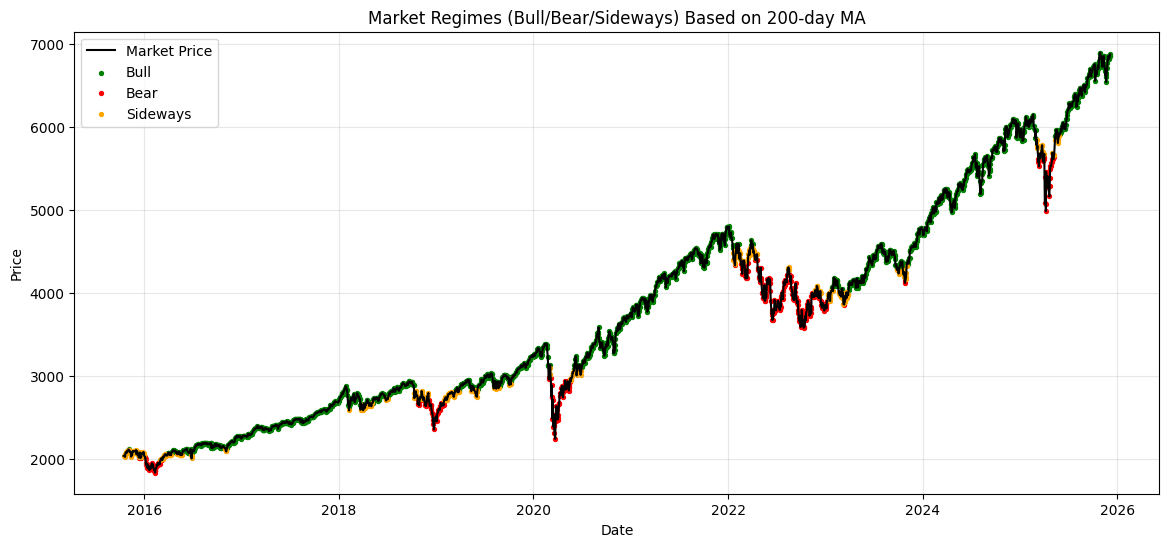

In [40]:
plt.figure(figsize=(14,6))

plt.plot(regime_df["Price"], color="black", label="Market Price")

for regime, color in zip(["Bull","Bear","Sideways"], ["green","red","orange"]):
    mask = regime_df["Regime"] == regime
    plt.scatter(regime_df.index[mask], regime_df["Price"][mask],
                s=8, label=regime, color=color)

plt.title("Market Regimes (Bull/Bear/Sideways) Based on 200-day MA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [41]:
regimes = ["Bull", "Bear", "Sideways"]

# Store results as: dict[regime][ticker] = {alpha, beta}
regime_capm_results = {reg: {} for reg in regimes}

for reg in regimes:

    # Filter data for the specific regime
    reg_data = log_returns_regime[log_returns_regime["Regime"] == reg]

    # Extract excess returns
    r_mkt_reg = (reg_data["MKT"] - rf_series).dropna()
    r_assets_reg = reg_data[tickers].sub(rf_series, axis=0).dropna()

    for ticker in tickers:
        y = r_assets_reg[ticker]
        X = r_mkt_reg

        if len(X) < 30:
            # Not enough data for regression
            regime_capm_results[reg][ticker] = {"alpha": np.nan, "beta": np.nan}
            continue

        X = sm.add_constant(X)

        model = sm.OLS(y, X).fit()

        alpha = model.params["const"]
        beta = model.params[X.columns[1]]

        # Store results
        regime_capm_results[reg][ticker] = {
            "alpha": alpha,
            "beta": beta,
            "model": model
        }

# Convert to a clean DataFrame
regime_alpha_beta_df = pd.DataFrame({
    (reg, metric): {tick: regime_capm_results[reg][tick][metric]
                    for tick in tickers}
    for reg in regimes
    for metric in ["alpha", "beta"]
})

regime_alpha_beta_df


Bull                Bear            Sideways          
         alpha      beta     alpha      beta     alpha      beta
GOOG  0.000447  1.265337 -0.000481  1.048102 -0.000052  1.180650
META  0.000277  1.362890  0.000269  1.247219 -0.000912  1.373137
NFLX  0.000386  1.174943  0.002259  1.039054 -0.002097  1.368247
AAPL  0.000541  1.204614 -0.000722  1.214249  0.000753  1.154817
MSFT  0.000280  1.232898  0.000606  1.159748  0.000677  1.151561

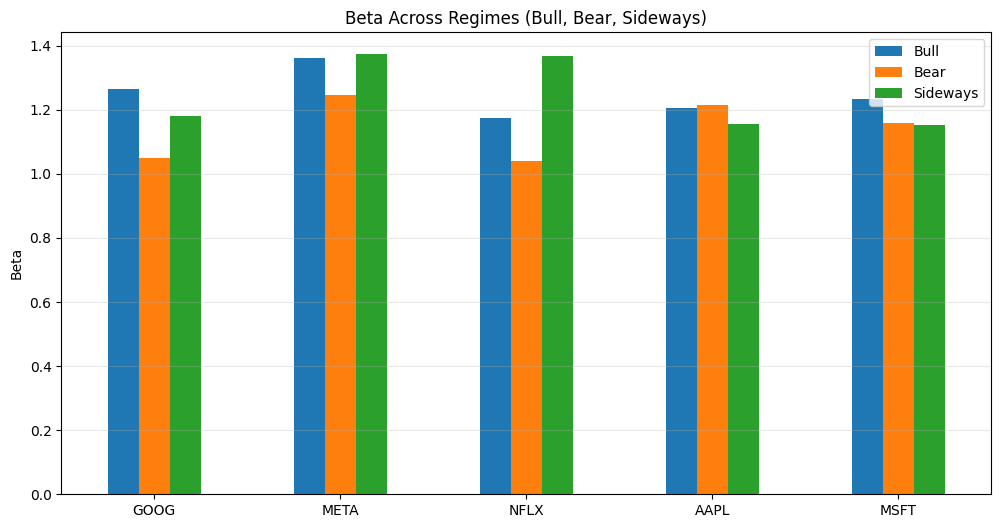

In [42]:
beta_regime_df = pd.DataFrame({
    reg: {ticker: regime_capm_results[reg][ticker]["beta"] for ticker in tickers}
    for reg in regimes
})

beta_regime_df.plot(kind="bar", figsize=(12,6))
plt.title("Beta Across Regimes (Bull, Bear, Sideways)")
plt.ylabel("Beta")
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.show()


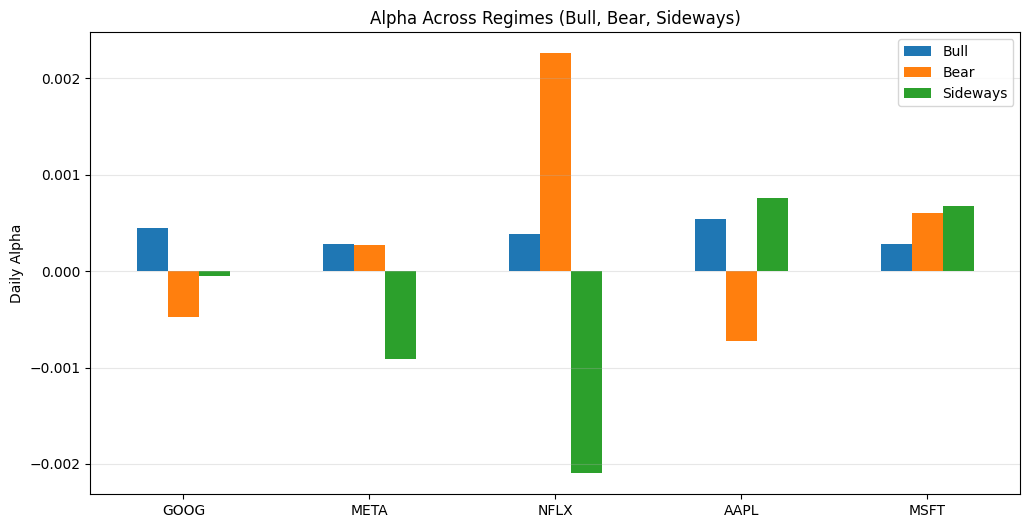

In [43]:
alpha_regime_df = pd.DataFrame({
    reg: {ticker: regime_capm_results[reg][ticker]["alpha"] for ticker in tickers}
    for reg in regimes
})

alpha_regime_df.plot(kind="bar", figsize=(12,6))
plt.title("Alpha Across Regimes (Bull, Bear, Sideways)")
plt.ylabel("Daily Alpha")
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.show()


In [44]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

window = 252  # 1-year rolling window
rolling_r2 = pd.DataFrame(index=excess_mkt.index, columns=tickers)

for ticker in tickers:
    for end in range(window, len(excess_mkt)):
        start = end - window

        # Slice the window
        y = excess_assets[ticker].iloc[start:end]
        X = excess_mkt.iloc[start:end]

        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()

        rolling_r2.loc[excess_mkt.index[end], ticker] = model.rsquared

rolling_r2 = rolling_r2.dropna()
rolling_r2.tail()


GOOG      META      NFLX      AAPL      MSFT
Date                                                        
2025-12-01  0.383641  0.497756  0.260389   0.55921  0.520396
2025-12-02  0.384113  0.497765  0.258162  0.555212  0.521758
2025-12-03  0.384182  0.497573  0.258666  0.555252  0.521695
2025-12-04     0.385  0.496153  0.250277  0.554046  0.513892
2025-12-05  0.384653  0.494943  0.250041  0.553022  0.515267

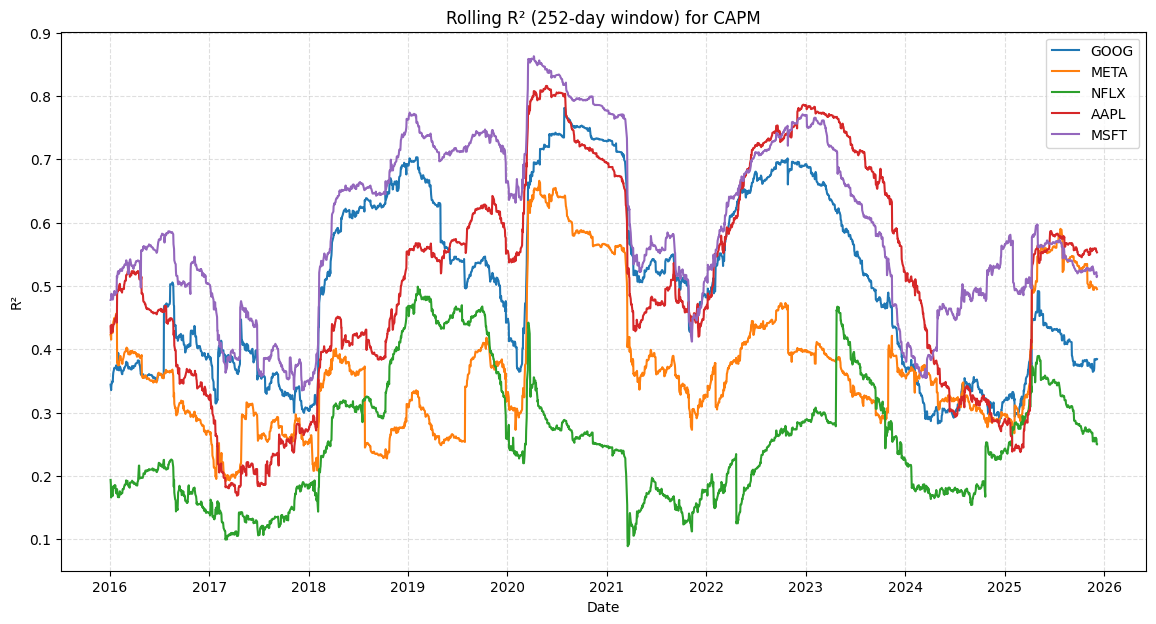

In [45]:
# %% [markdown]
# ## Rolling R² Visualization

# %%
plt.figure(figsize=(14,7))

for ticker in tickers:
    plt.plot(rolling_r2.index, rolling_r2[ticker], label=ticker)

plt.title("Rolling R² (252-day window) for CAPM")
plt.xlabel("Date")
plt.ylabel("R²")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


In [46]:
# %% [markdown]
# # Statistical Significance of Alpha and Beta Across Regimes
#
# Extracts:
# - alpha
# - beta
# - t-stat(alpha)
# - t-stat(beta)
# - p-value(alpha)
# - p-value(beta)


# %%
significance_results = []

for reg in regimes:   # ["Bull", "Bear", "Sideways"]
    for ticker in tickers:
        entry = regime_capm_results[reg].get(ticker, {})

        model = entry.get("model", None)
        alpha = entry.get("alpha", np.nan)
        beta = entry.get("beta", np.nan)

        if model is None:
            # not enough data for this regime
            significance_results.append({
                "Ticker": ticker,
                "Regime": reg,
                "Alpha": np.nan,
                "Beta": np.nan,
                "Alpha_t": np.nan,
                "Beta_t": np.nan,
                "Alpha_p": np.nan,
                "Beta_p": np.nan
            })
            continue

        # Extract t-stats & p-values
        alpha_t = model.tvalues["const"]
        beta_t = model.tvalues[model.params.index[1]]

        alpha_p = model.pvalues["const"]
        beta_p = model.pvalues[model.params.index[1]]

        significance_results.append({
            "Ticker": ticker,
            "Regime": reg,
            "Alpha": alpha,
            "Beta": beta,
            "Alpha_t": alpha_t,
            "Beta_t": beta_t,
            "Alpha_p": alpha_p,
            "Beta_p": beta_p
        })

significance_df = pd.DataFrame(significance_results)
significance_df


Ticker    Regime     Alpha      Beta   Alpha_t     Beta_t   Alpha_p  \
0    GOOG      Bull  0.000447  1.265337  1.619779  34.500378  0.105449   
1    META      Bull  0.000277  1.362890  0.721374  26.753872  0.470770   
2    NFLX      Bull  0.000386  1.174943  0.846267  19.370502  0.397513   
3    AAPL      Bull  0.000541  1.204614  1.970440  33.002275  0.048936   
4    MSFT      Bull  0.000280  1.232898  1.273424  42.200191  0.203026   
5    GOOG      Bear -0.000481  1.048102 -0.601685  28.980560  0.547762   
6    META      Bear  0.000269  1.247219  0.184296  18.896546  0.853885   
7    NFLX      Bear  0.002259  1.039054  1.480784  15.060030  0.139536   
8    AAPL      Bear -0.000722  1.214249 -1.009524  37.543828  0.313399   
9    MSFT      Bear  0.000606  1.159748  0.897286  37.953971  0.370164   
10   GOOG  Sideways -0.000052  1.180650 -0.071460  20.291795  0.943076   
11   META  Sideways -0.000912  1.373137 -0.711623  13.442470  0.477215   
12   NFLX  Sideways -0.002097  1.368247 -1.067973   8.738790  0.286335   
13   AAPL  Sideways  0.000753  1.154817  1.153371  22.182129  0.249616   
14   MSFT  Sideways  0.000677  1.151561  1.101146  23.479579  0.271658   

           Beta_p  
0   4.338339e-202  
1   1.064959e-133  
2    2.669320e-76  
3   1.871176e-188  
4   1.176562e-273  
5    3.025863e-96  
6    7.316450e-56  
7    4.086047e-40  
8   1.044963e-126  
9   4.560803e-128  
10   1.739615e-59  
11   5.501952e-33  
12   1.333165e-16  
13   9.485020e-67  
14   1.161836e-71

In [47]:
# %%
significance_pivot = significance_df.pivot(index="Ticker", columns="Regime",
                                           values=["Alpha", "Beta", "Alpha_t", "Beta_t", "Alpha_p", "Beta_p"])

significance_pivot


Alpha                          Beta                       Alpha_t  \
Regime      Bear      Bull  Sideways      Bear      Bull  Sideways      Bear   
Ticker                                                                         
AAPL   -0.000722  0.000541  0.000753  1.214249  1.204614  1.154817 -1.009524   
GOOG   -0.000481  0.000447 -0.000052  1.048102  1.265337  1.180650 -0.601685   
META    0.000269  0.000277 -0.000912  1.247219  1.362890  1.373137  0.184296   
MSFT    0.000606  0.000280  0.000677  1.159748  1.232898  1.151561  0.897286   
NFLX    0.002259  0.000386 -0.002097  1.039054  1.174943  1.368247  1.480784   

                               Beta_t                         Alpha_p  \
Regime      Bull  Sideways       Bear       Bull   Sideways      Bear   
Ticker                                                                  
AAPL    1.970440  1.153371  37.543828  33.002275  22.182129  0.313399   
GOOG    1.619779 -0.071460  28.980560  34.500378  20.291795  0.547762   
META    0.721374 -0.711623  18.896546  26.753872  13.442470  0.853885   
MSFT    1.273424  1.101146  37.953971  42.200191  23.479579  0.370164   
NFLX    0.846267 -1.067973  15.060030  19.370502   8.738790  0.139536   

                                   Beta_p                               
Regime      Bull  Sideways           Bear           Bull      Sideways  
Ticker                                                                  
AAPL    0.048936  0.249616  1.044963e-126  1.871176e-188  9.485020e-67  
GOOG    0.105449  0.943076   3.025863e-96  4.338339e-202  1.739615e-59  
META    0.470770  0.477215   7.316450e-56  1.064959e-133  5.501952e-33  
MSFT    0.203026  0.271658  4.560803e-128  1.176562e-273  1.161836e-71  
NFLX    0.397513  0.286335   4.086047e-40   2.669320e-76  1.333165e-16

In [48]:
# %% [markdown]
# # Label Alpha and Beta as Significant / Not Significant
#
# Based on:
# - p-value < 0.05  (primary condition)
# - or |t-stat| > 1.96 (secondary condition)


# %%

def label_significance(p, t):
    if pd.isna(p) or pd.isna(t):
        return "No Data"
    if (p < 0.05) or (abs(t) > 1.96):
        return "Significant"
    else:
        return "Not Significant"

# Apply labeling for alpha
significance_df["Alpha_Significance"] = significance_df.apply(
    lambda row: label_significance(row["Alpha_p"], row["Alpha_t"]), axis=1
)

# Apply labeling for beta
significance_df["Beta_Significance"] = significance_df.apply(
    lambda row: label_significance(row["Beta_p"], row["Beta_t"]), axis=1
)

significance_df.head()


Ticker Regime     Alpha      Beta   Alpha_t     Beta_t   Alpha_p  \
0   GOOG   Bull  0.000447  1.265337  1.619779  34.500378  0.105449   
1   META   Bull  0.000277  1.362890  0.721374  26.753872  0.470770   
2   NFLX   Bull  0.000386  1.174943  0.846267  19.370502  0.397513   
3   AAPL   Bull  0.000541  1.204614  1.970440  33.002275  0.048936   
4   MSFT   Bull  0.000280  1.232898  1.273424  42.200191  0.203026   

          Beta_p Alpha_Significance Beta_Significance  
0  4.338339e-202    Not Significant       Significant  
1  1.064959e-133    Not Significant       Significant  
2   2.669320e-76    Not Significant       Significant  
3  1.871176e-188        Significant       Significant  
4  1.176562e-273    Not Significant       Significant

In [49]:
# %%
significance_labels = significance_df.pivot_table(
    index="Ticker",
    columns="Regime",
    values=["Alpha_Significance", "Beta_Significance"],
    aggfunc="first"
)

significance_labels


Alpha_Significance                                   Beta_Significance  \
Regime               Bear             Bull         Sideways              Bear   
Ticker                                                                          
AAPL      Not Significant      Significant  Not Significant       Significant   
GOOG      Not Significant  Not Significant  Not Significant       Significant   
META      Not Significant  Not Significant  Not Significant       Significant   
MSFT      Not Significant  Not Significant  Not Significant       Significant   
NFLX      Not Significant  Not Significant  Not Significant       Significant   

                                  
Regime         Bull     Sideways  
Ticker                            
AAPL    Significant  Significant  
GOOG    Significant  Significant  
META    Significant  Significant  
MSFT    Significant  Significant  
NFLX    Significant  Significant

In [50]:
from statsmodels.stats.diagnostic import het_breuschpagan

hetero_results = []

for ticker in tickers:
    model = results_df.loc[ticker, "Model"]  # CAPM model

    residuals = model.resid
    exog = model.model.exog  # includes constant + market factor

    lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(residuals, exog)

    hetero_results.append({
        "Ticker": ticker,
        "LM Statistic": lm_stat,
        "LM p-value": lm_pvalue,
        "F Statistic": f_stat,
        "F p-value": f_pvalue,
        "Heteroskedastic?": "Yes" if lm_pvalue < 0.05 else "No"
    })

hetero_df = pd.DataFrame(hetero_results)
hetero_df


Ticker  LM Statistic  LM p-value  F Statistic  F p-value Heteroskedastic?
0   GOOG      0.100809    0.750861     0.100739   0.750968               No
1   META      0.779794    0.377204     0.779448   0.377387               No
2   NFLX      0.004913    0.944118     0.004910   0.944143               No
3   AAPL      3.101273    0.078231     3.102518   0.078283               No
4   MSFT      0.060140    0.806275     0.060097   0.806360               No

In [51]:
regime_hetero_results = []

for reg in regimes:  # ["Bull", "Bear", "Sideways"]
    for ticker in tickers:
        model = regime_capm_results[reg][ticker].get("model", None)

        if model is None:
            regime_hetero_results.append({
                "Ticker": ticker,
                "Regime": reg,
                "LM p-value": np.nan,
                "F p-value": np.nan,
                "Heteroskedastic?": "No Data"
            })
            continue

        residuals = model.resid
        exog = model.model.exog

        lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(residuals, exog)

        regime_hetero_results.append({
            "Ticker": ticker,
            "Regime": reg,
            "LM p-value": lm_pvalue,
            "F p-value": f_pvalue,
            "Heteroskedastic?": "Yes" if lm_pvalue < 0.05 else "No"
        })

regime_hetero_df = pd.DataFrame(regime_hetero_results)
regime_hetero_df


Ticker    Regime  LM p-value  F p-value Heteroskedastic?
0    GOOG      Bull    0.349033   0.349300               No
1    META      Bull    0.189070   0.189265               No
2    NFLX      Bull    0.155164   0.155329               No
3    AAPL      Bull    0.095755   0.095854               No
4    MSFT      Bull    0.733709   0.733877               No
5    GOOG      Bear    0.884090   0.884485               No
6    META      Bear    0.908400   0.908714               No
7    NFLX      Bear    0.385755   0.387150               No
8    AAPL      Bear    0.512030   0.513362               No
9    MSFT      Bear    0.701521   0.702472               No
10   GOOG  Sideways    0.480187   0.481722               No
11   META  Sideways    0.080048   0.080502               No
12   NFLX  Sideways    0.745981   0.746913               No
13   AAPL  Sideways    0.405642   0.407214               No
14   MSFT  Sideways    0.329020   0.330542               No

In [52]:
# %% [markdown]
# # Autocorrelation Tests (Durbin-Watson & Ljung-Box) for All Tickers

from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox

autocorr_results = []

for ticker in tickers:
    model = results_df.loc[ticker, "Model"]
    resid = model.resid

    # Durbin-Watson
    dw_stat = durbin_watson(resid)

    # Ljung-Box (use return_df=True for stability)
    lb_test = acorr_ljungbox(resid, lags=[10], return_df=True)
    lb_pvalue = float(lb_test["lb_pvalue"].iloc[0])   # <--- fixed

    autocorr_results.append({
        "Ticker": ticker,
        "Durbin_Watson": dw_stat,
        "LB_pvalue_lag10": lb_pvalue,
        "Autocorrelation?": "Yes" if lb_pvalue < 0.05 else "No"
    })

autocorr_df = pd.DataFrame(autocorr_results)
autocorr_df


Ticker  Durbin_Watson  LB_pvalue_lag10 Autocorrelation?
0   GOOG       1.934323         0.145074               No
1   META       1.954475         0.339393               No
2   NFLX       1.979965         0.689343               No
3   AAPL       1.859492         0.052152               No
4   MSFT       2.009675         0.660003               No

In [53]:
# %% [markdown]
# # Autocorrelation Tests for Regime-Based CAPM Models (Fixed Version)

from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox

regime_autocorr_results = []

for reg in regimes:  # ["Bull", "Bear", "Sideways"]
    for ticker in tickers:

        model = regime_capm_results[reg][ticker].get("model", None)

        if model is None:
            regime_autocorr_results.append({
                "Ticker": ticker,
                "Regime": reg,
                "Durbin_Watson": np.nan,
                "LB_pvalue_lag10": np.nan,
                "Autocorrelation?": "No Data"
            })
            continue

        resid = model.resid


        dw_stat = durbin_watson(resid)


        lb_test = acorr_ljungbox(resid, lags=[10], return_df=True)
        lb_pvalue = float(lb_test["lb_pvalue"].iloc[0])

        regime_autocorr_results.append({
            "Ticker": ticker,
            "Regime": reg,
            "Durbin_Watson": dw_stat,
            "LB_pvalue_lag10": lb_pvalue,
            "Autocorrelation?": "Yes" if lb_pvalue < 0.05 else "No"
        })

regime_autocorr_df = pd.DataFrame(regime_autocorr_results)
regime_autocorr_df


Ticker    Regime  Durbin_Watson  LB_pvalue_lag10 Autocorrelation?
0    GOOG      Bull       1.931889         0.238795               No
1    META      Bull       2.008449         0.764951               No
2    NFLX      Bull       1.995159         0.160513               No
3    AAPL      Bull       1.837464         0.134532               No
4    MSFT      Bull       2.012783         0.509035               No
5    GOOG      Bear       1.897035         0.359516               No
6    META      Bear       1.943647         0.543081               No
7    NFLX      Bear       2.016400         0.838873               No
8    AAPL      Bear       1.903272         0.634104               No
9    MSFT      Bear       1.877503         0.502008               No
10   GOOG  Sideways       1.874797         0.667422               No
11   META  Sideways       1.932405         0.380323               No
12   NFLX  Sideways       2.031927         0.997127               No
13   AAPL  Sideways       1.717789         0.160123               No
14   MSFT  Sideways       1.984567         0.839956               No

In [99]:
# %% [markdown]
# # Recursive Beta Stability Test

recursive_betas = {ticker: [] for ticker in tickers}
dates = excess_mkt.index

for ticker in tickers:
    for end in range(60, len(dates)):  # require at least 60 obs before estimating
        y = excess_assets[ticker].iloc[:end]
        X = sm.add_constant(excess_mkt.iloc[:end])

        model = sm.OLS(y, X).fit()
        recursive_betas[ticker].append(model.params[1])  # beta coefficient

recursive_betas_df = pd.DataFrame(recursive_betas, index=dates[60:])
recursive_betas_df.tail()


GOOG      META      NFLX      AAPL      MSFT
Date                                                        
2025-12-01  1.135433  1.290582  1.142878  1.201540  1.184096
2025-12-02  1.135598  1.290652  1.142554  1.201193  1.184175
2025-12-03  1.135596  1.290688  1.142546  1.201236  1.184194
2025-12-04  1.135672  1.290575  1.142154  1.201156  1.183984
2025-12-05  1.135657  1.290634  1.142137  1.201131  1.183993

In [55]:
recursive_betas_df.tail()

GOOG      META      NFLX      AAPL      MSFT
Date                                                        
2025-12-01  1.135433  1.290582  1.142878  1.201540  1.184096
2025-12-02  1.135598  1.290652  1.142554  1.201193  1.184175
2025-12-03  1.135596  1.290688  1.142546  1.201236  1.184194
2025-12-04  1.135672  1.290575  1.142154  1.201156  1.183984
2025-12-05  1.135657  1.290634  1.142137  1.201131  1.183993

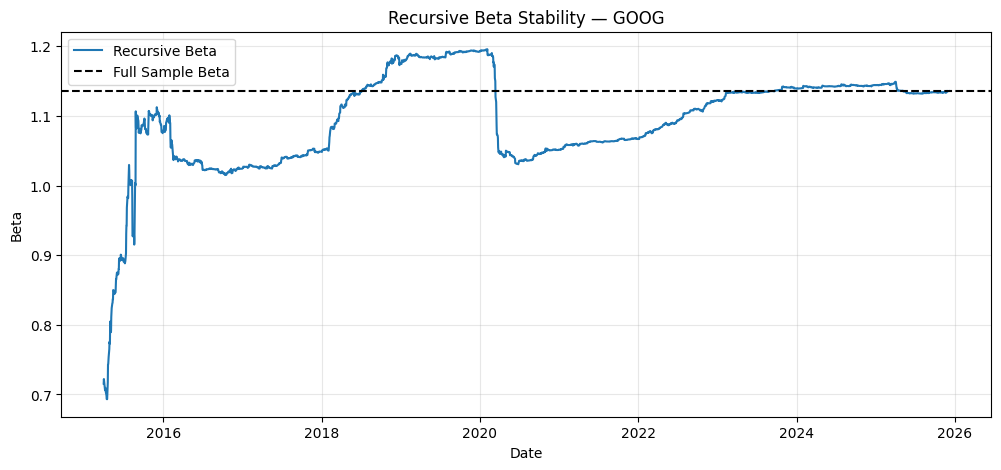

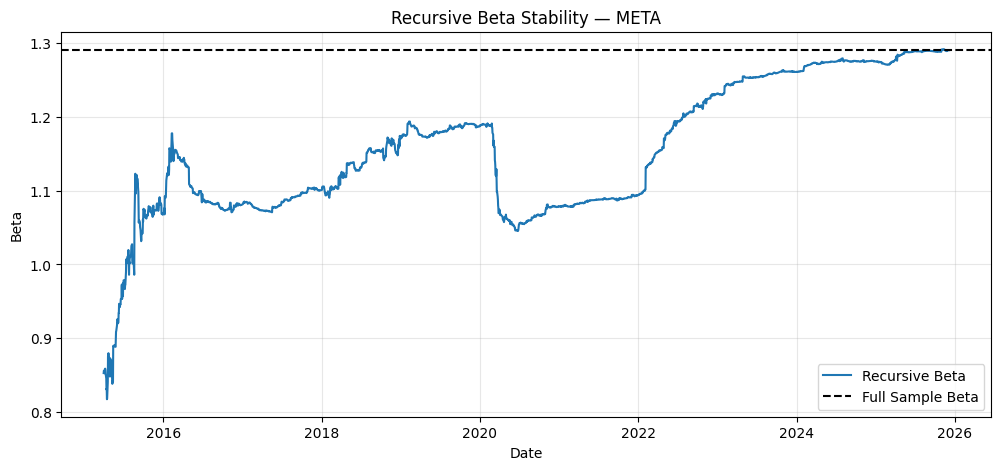

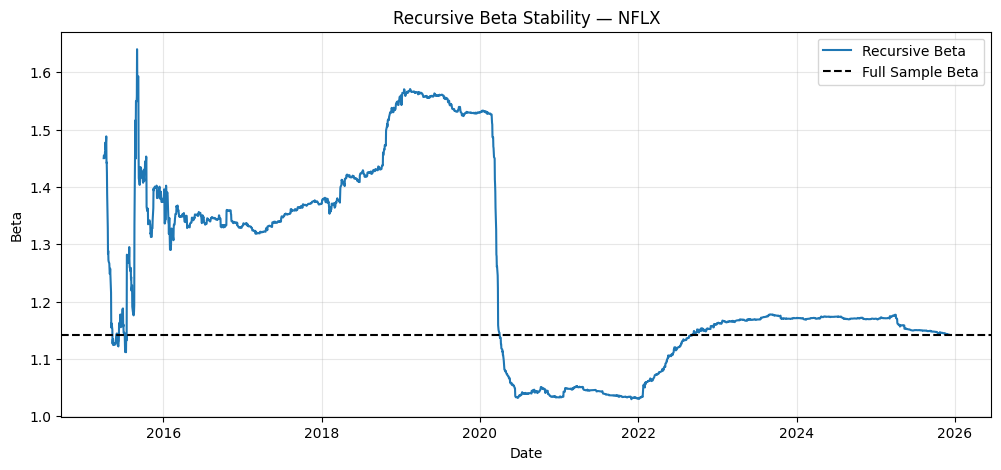

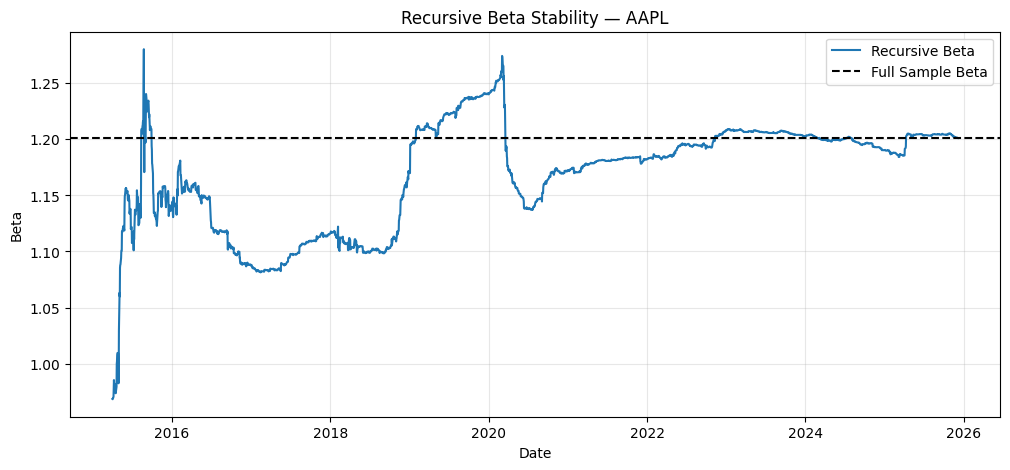

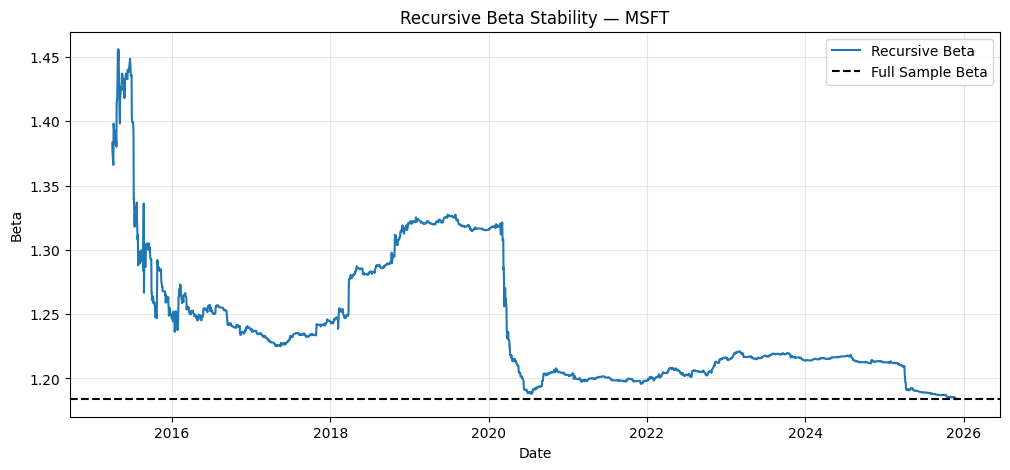

In [56]:
# %% [markdown]
# # Recursive Beta Plots

for ticker in tickers:
    plt.figure(figsize=(12,5))
    plt.plot(recursive_betas_df.index, recursive_betas_df[ticker], label="Recursive Beta")
    plt.axhline(results_df.loc[ticker, "Beta"], linestyle="--", color="black", label="Full Sample Beta")
    plt.title(f"Recursive Beta Stability — {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Beta")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()


In [68]:
# %% [markdown]
# # CUSUM Stability Test (Manual Implementation)

from statsmodels.stats.diagnostic import recursive_olsresiduals

cusum_results = {}

for ticker in tickers:
    y = excess_assets[ticker].values
    X = sm.add_constant(excess_mkt).values

    # First, fit the OLS model
    model = sm.OLS(y, X).fit()

    # Now compute recursive residuals (CUSUM)
    # The function returns a tuple. The recursive residuals are the first element.
    rec_results = recursive_olsresiduals(model)
    cusum_results[ticker] = rec_results[0]

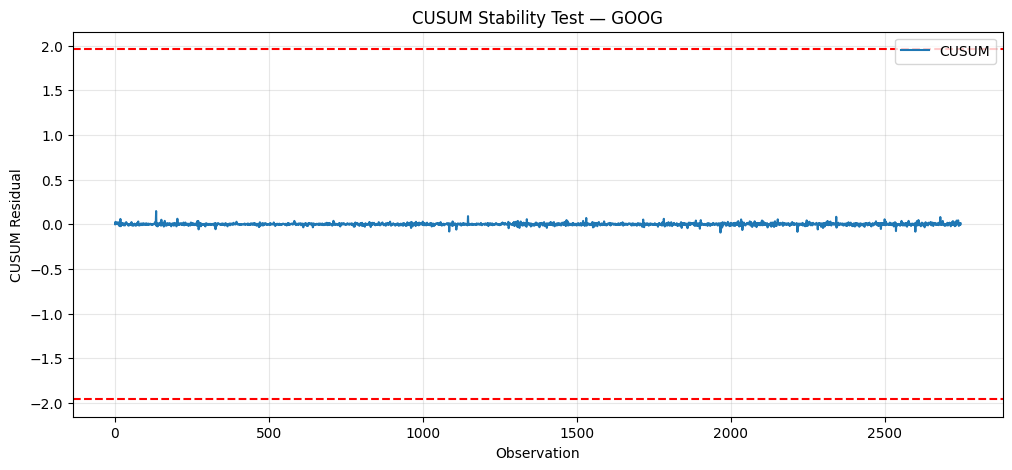

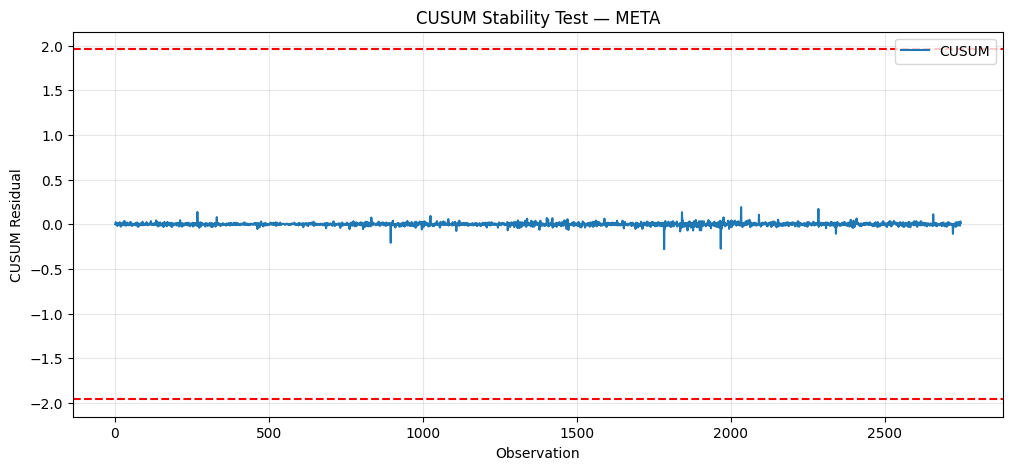

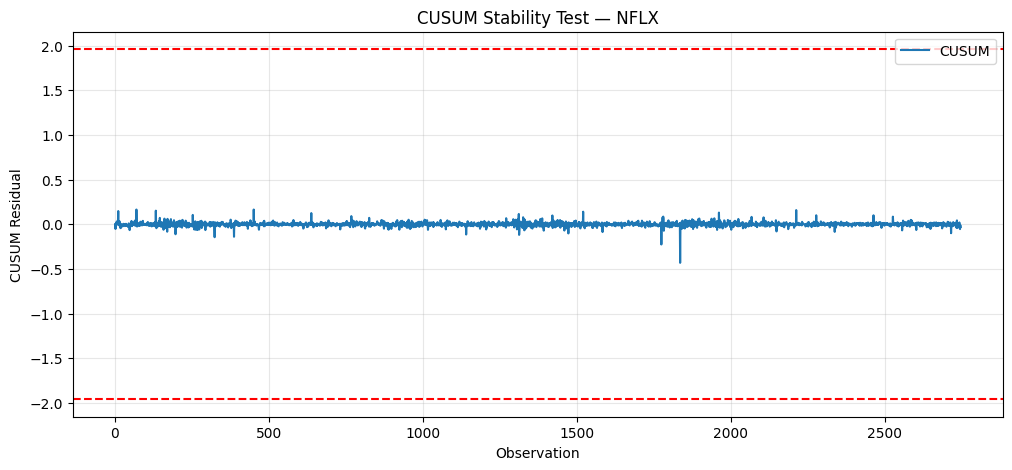

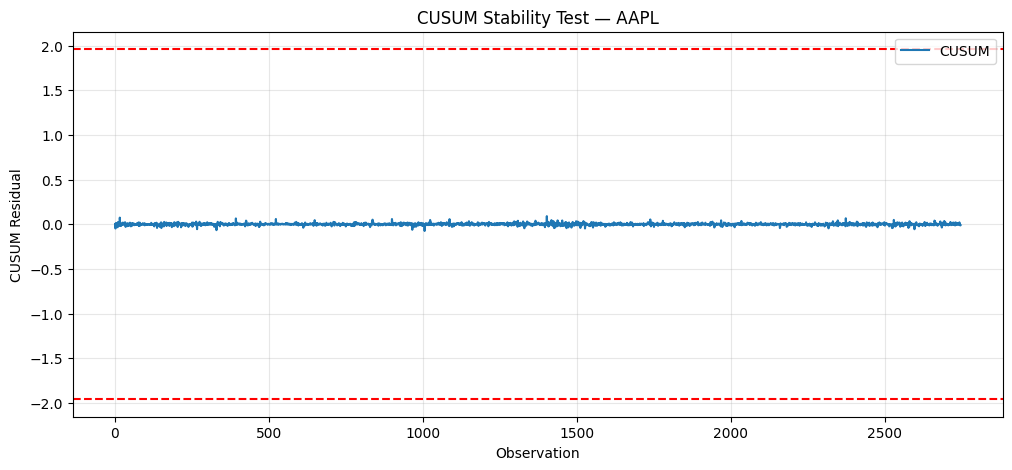

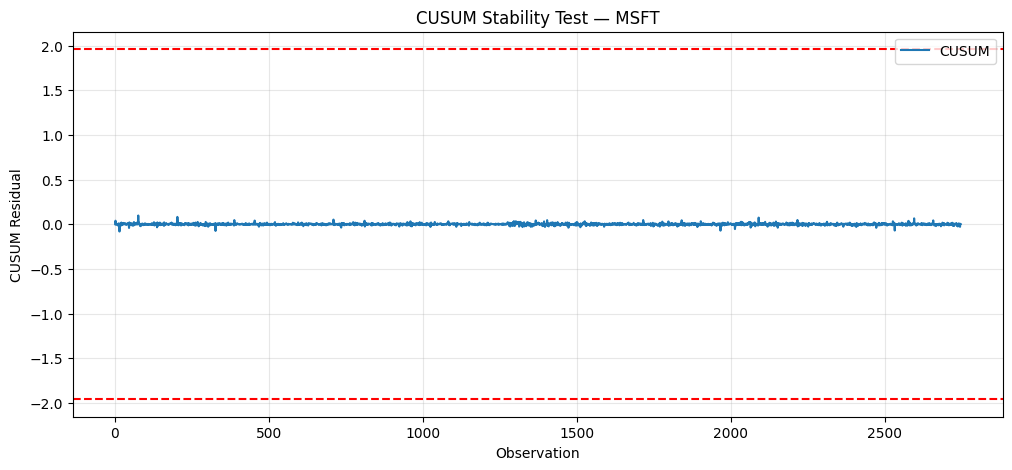

In [69]:
# %% [markdown]
# # CUSUM Plots

for ticker in tickers:
    plt.figure(figsize=(12,5))
    plt.plot(cusum_results[ticker], label="CUSUM")
    plt.axhline(1.96, linestyle="--", color="red")
    plt.axhline(-1.96, linestyle="--", color="red")
    plt.title(f"CUSUM Stability Test — {ticker}")
    plt.xlabel("Observation")
    plt.ylabel("CUSUM Residual")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()


In [70]:
# %% [markdown]
# # Beta Comparison Across Rolling Window, Regimes, and Full Sample

beta_compare = []

for ticker in tickers:
    full_beta = results_df.loc[ticker, "Beta"]

    regime_bull = regime_capm_results["Bull"][ticker]["beta"]
    regime_bear = regime_capm_results["Bear"][ticker]["beta"]
    regime_side = regime_capm_results["Sideways"][ticker]["beta"]

    rolling_mean = rolling_betas[ticker].mean()
    rolling_std  = rolling_betas[ticker].std()

    beta_compare.append({
        "Ticker": ticker,
        "Full_Sample_Beta": full_beta,
        "Rolling_Mean_Beta": rolling_mean,
        "Rolling_Std_Beta": rolling_std,
        "Bull_Regime_Beta": regime_bull,
        "Bear_Regime_Beta": regime_bear,
        "Sideways_Regime_Beta": regime_side,
    })

beta_compare_df = pd.DataFrame(beta_compare).set_index("Ticker")
beta_compare_df


Full_Sample_Beta  Rolling_Mean_Beta  Rolling_Std_Beta  \
Ticker                                                          
GOOG            1.135695           1.212132          0.163719   
META            1.290698           1.355134          0.272820   
NFLX            1.142001           1.316590          0.344165   
AAPL            1.201091           1.206111          0.172989   
MSFT            1.184002           1.225098          0.127549   

        Bull_Regime_Beta  Bear_Regime_Beta  Sideways_Regime_Beta  
Ticker                                                            
GOOG            1.265337          1.048102              1.180650  
META            1.362890          1.247219              1.373137  
NFLX            1.174943          1.039054              1.368247  
AAPL            1.204614          1.214249              1.154817  
MSFT            1.232898          1.159748              1.151561

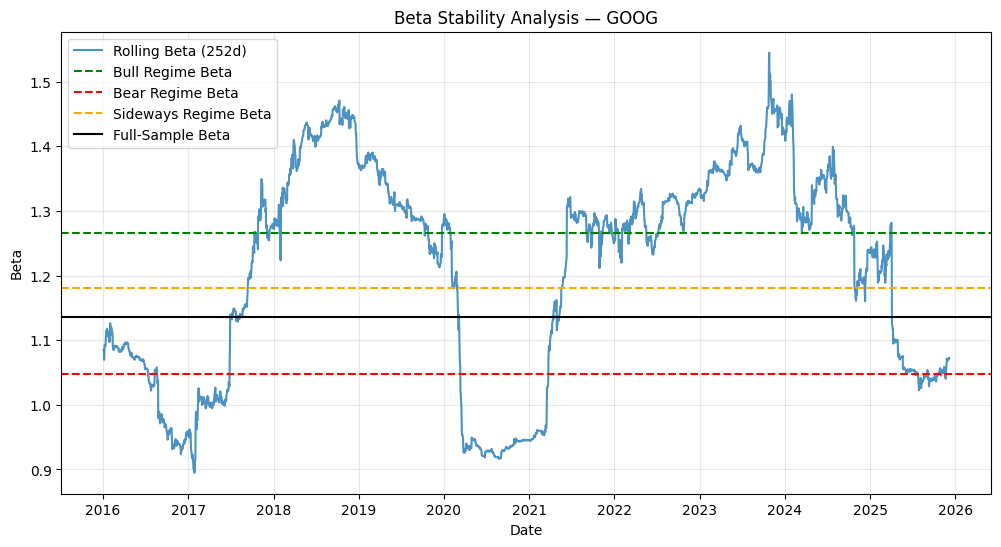

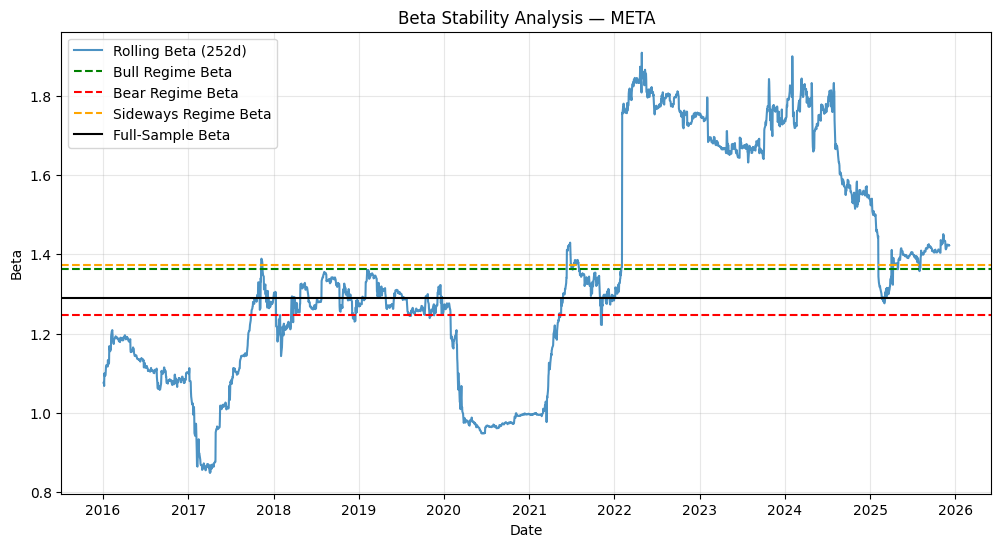

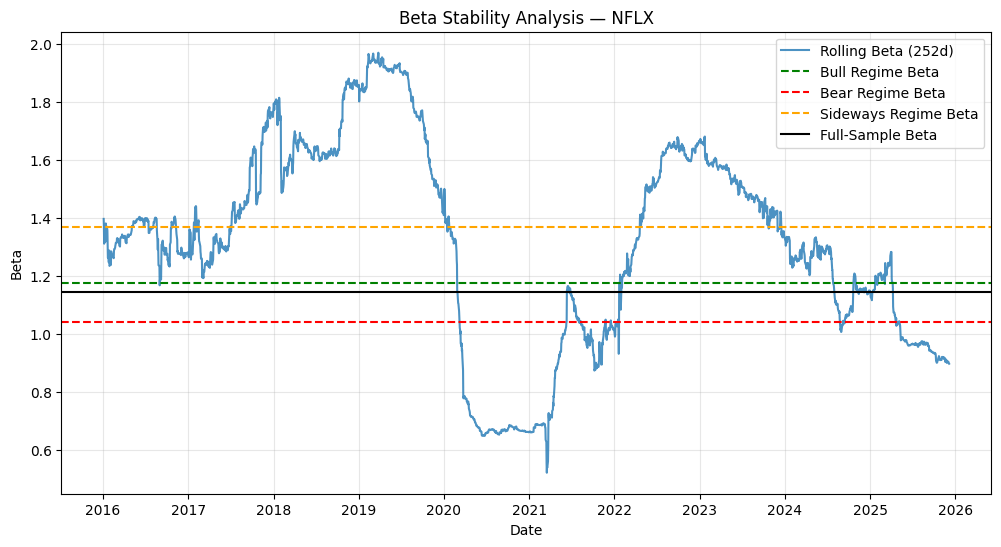

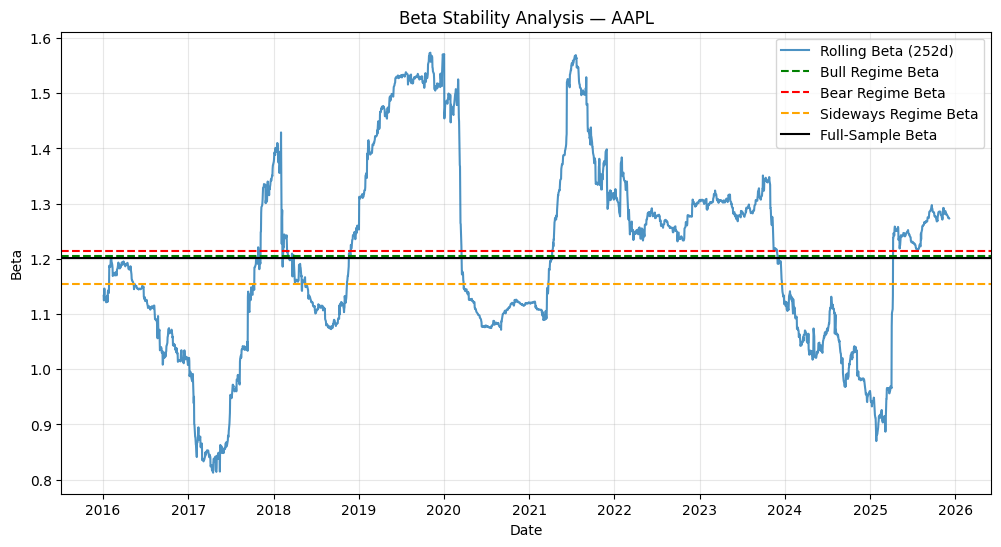

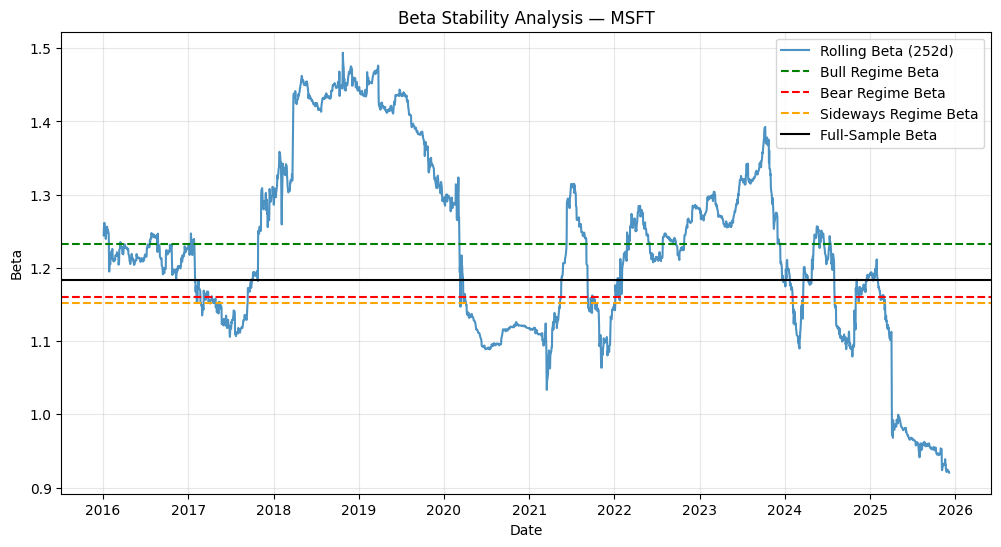

In [71]:
# %% [markdown]
# # Visualizing Beta Stability: Rolling Beta + Regime Betas + Full Sample Beta

for ticker in tickers:
    plt.figure(figsize=(12,6))

    # Rolling beta
    plt.plot(rolling_betas[ticker], label="Rolling Beta (252d)", alpha=0.8)

    # Horizontal lines for regime betas
    plt.axhline(beta_compare_df.loc[ticker, "Bull_Regime_Beta"], color="green", linestyle="--", label="Bull Regime Beta")
    plt.axhline(beta_compare_df.loc[ticker, "Bear_Regime_Beta"], color="red", linestyle="--", label="Bear Regime Beta")
    plt.axhline(beta_compare_df.loc[ticker, "Sideways_Regime_Beta"], color="orange", linestyle="--", label="Sideways Regime Beta")

    # Full-sample beta
    plt.axhline(beta_compare_df.loc[ticker, "Full_Sample_Beta"], color="black", linestyle="-", label="Full-Sample Beta")

    plt.title(f"Beta Stability Analysis — {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Beta")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


Out of Sample Testing


In [72]:
# Define date ranges
train_start = "2015-01-01"
train_end   = "2023-12-31"
test_start  = "2024-01-01"

train_data = log_returns.loc[train_start:train_end]
test_data  = log_returns.loc[test_start:]


In [73]:
rf_train = rf_series.loc[train_start:train_end]
rf_test  = rf_series.loc[test_start:]

excess_mkt_train = train_data["MKT"] - rf_train
excess_mkt_test  = test_data["MKT"] - rf_test

excess_assets_train = train_data[tickers].sub(rf_train, axis=0)
excess_assets_test  = test_data[tickers].sub(rf_test, axis=0)


In [74]:
import statsmodels.api as sm

capm_models_2015_2023 = {}

for ticker in tickers:
    y = excess_assets_train[ticker]
    X = sm.add_constant(excess_mkt_train)

    model = sm.OLS(y, X).fit()
    capm_models_2015_2023[ticker] = model


In [75]:
params_2015_2023 = {
    ticker: {
        "alpha": model.params["const"],
        "beta":  model.params[model.params.index[1]]
    }
    for ticker, model in capm_models_2015_2023.items()
}

params_2015_2023


{'GOOG': {'alpha': np.float64(0.00033721648557575803),
  'beta': np.float64(1.1393014177359087)},
 'META': {'alpha': np.float64(0.00022802576726184453),
  'beta': np.float64(1.2612451153632231)},
 'NFLX': {'alpha': np.float64(0.0005921968786418301),
  'beta': np.float64(1.1711372245071623)},
 'AAPL': {'alpha': np.float64(0.0004887126777406284),
  'beta': np.float64(1.2026250934859517)},
 'MSFT': {'alpha': np.float64(0.0005594240946223986),
  'beta': np.float64(1.2140892113947632)}}

In [76]:
predicted_excess_returns = pd.DataFrame(index=excess_mkt_test.index)

for ticker in tickers:
    a = params_2015_2023[ticker]["alpha"]
    b = params_2015_2023[ticker]["beta"]

    predicted_excess_returns[ticker] = a + b * excess_mkt_test


In [77]:
predicted_returns = predicted_excess_returns.add(rf_test, axis=0)
actual_returns    = test_data[tickers]
forecast_errors = predicted_returns - actual_returns
metrics = {}

for ticker in tickers:
    err = forecast_errors[ticker].dropna()

    metrics[ticker] = {
        "RMSE": np.sqrt(np.mean(err**2)),
        "MAE": np.mean(np.abs(err)),
        "Mean_Error": np.mean(err),
        "Correlation": np.corrcoef(predicted_returns[ticker].dropna(),
                                   actual_returns[ticker].dropna())[0,1]
    }

metrics_df = pd.DataFrame(metrics).T
metrics_df


RMSE       MAE  Mean_Error  Correlation
GOOG  0.015147  0.010483   -0.000540     0.596917
META  0.018220  0.011772   -0.000192     0.635194
NFLX  0.017793  0.012219   -0.000036     0.483618
AAPL  0.013013  0.009362    0.000587     0.680876
MSFT  0.009953  0.006777    0.000900     0.723947

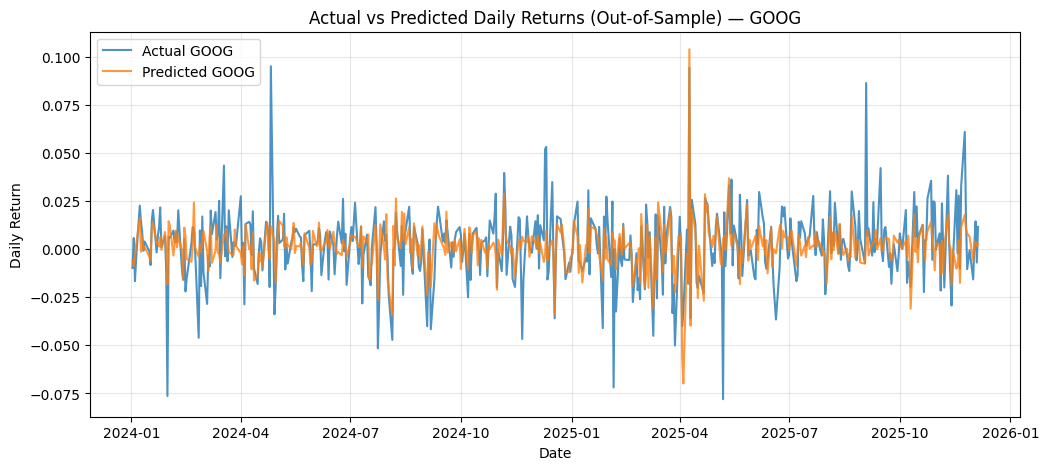

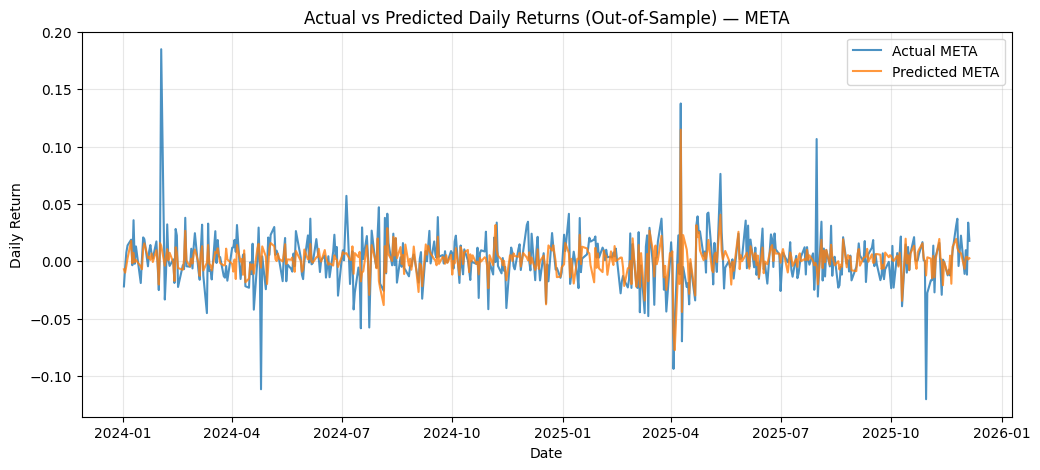

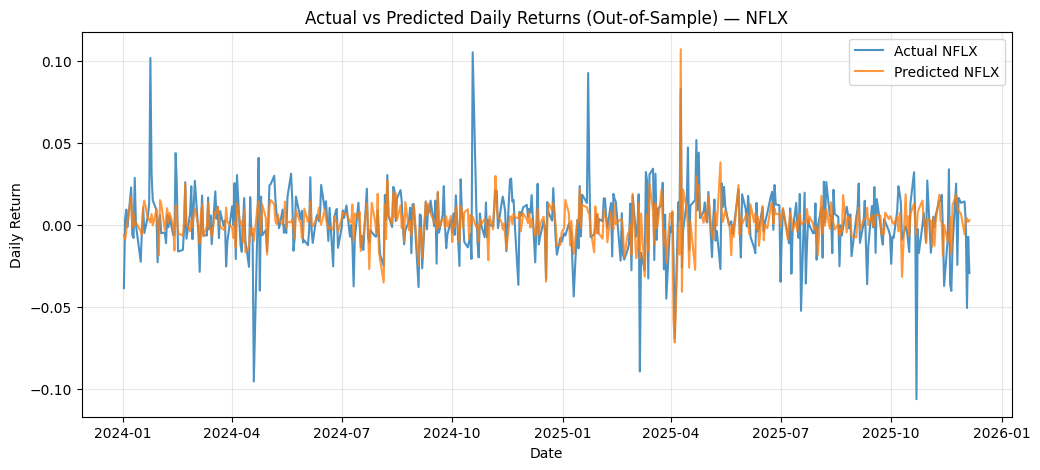

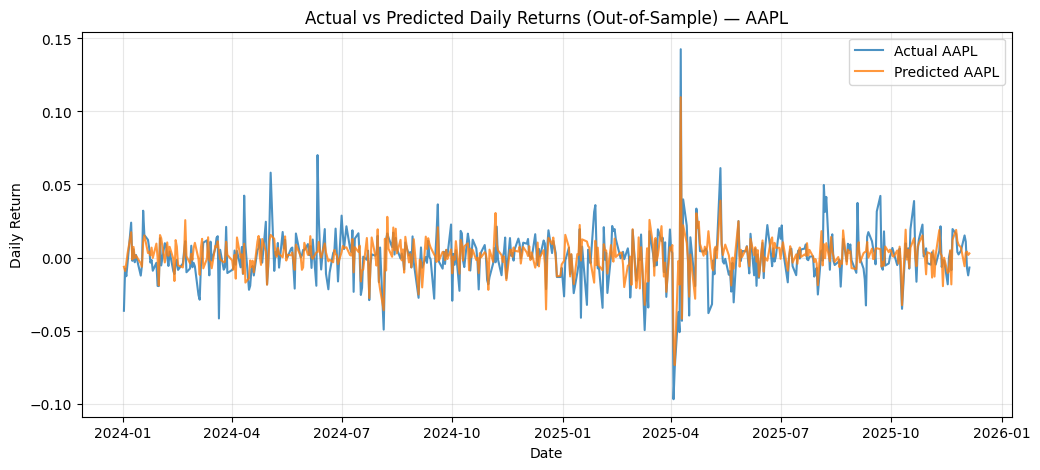

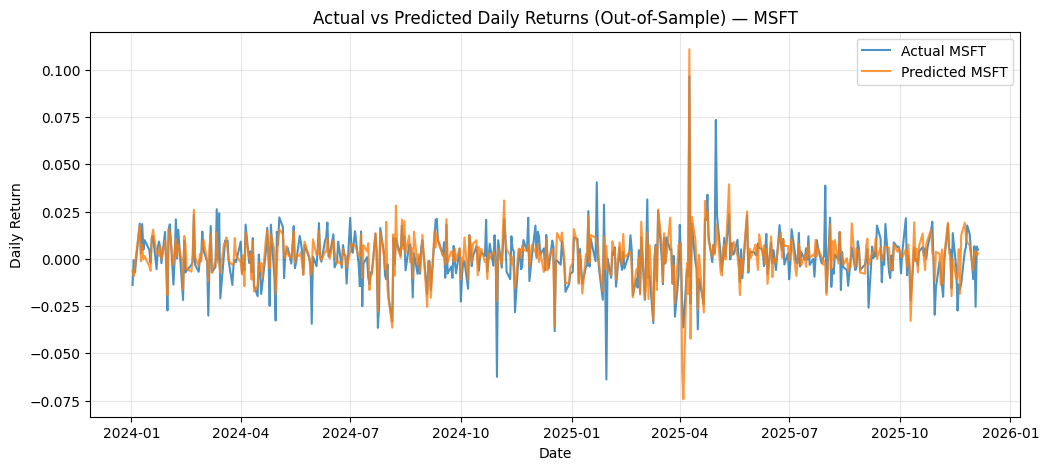

In [78]:
# %% [markdown]
# ## Actual vs Predicted Returns (Out-of-Sample) — All Tickers

for ticker in tickers:
    plt.figure(figsize=(12,5))

    plt.plot(actual_returns[ticker],
             label=f"Actual {ticker}", alpha=0.8)
    plt.plot(predicted_returns[ticker],
             label=f"Predicted {ticker}", alpha=0.8)

    plt.title(f"Actual vs Predicted Daily Returns (Out-of-Sample) — {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Daily Return")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


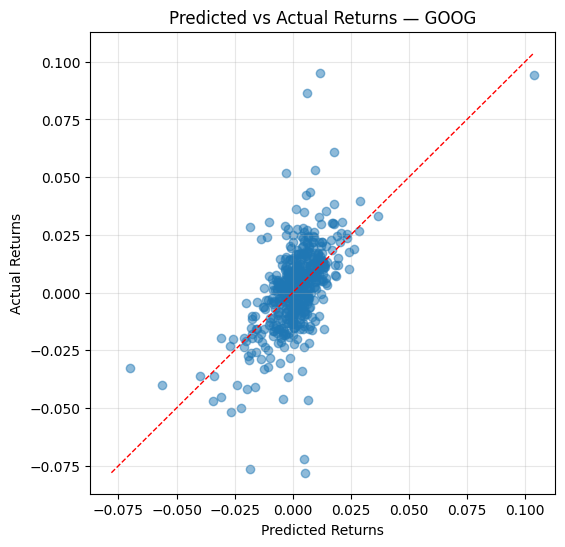

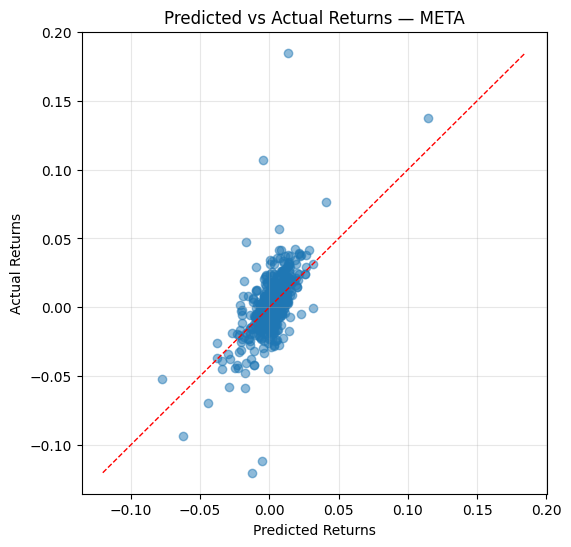

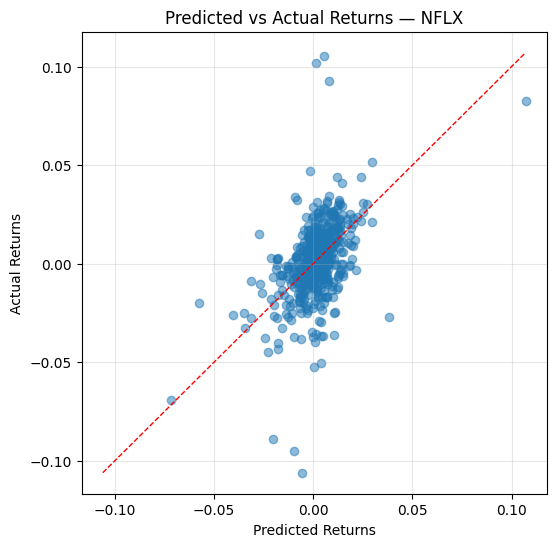

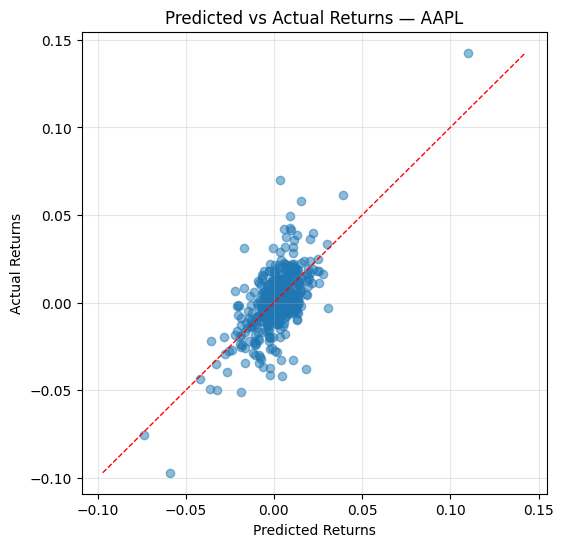

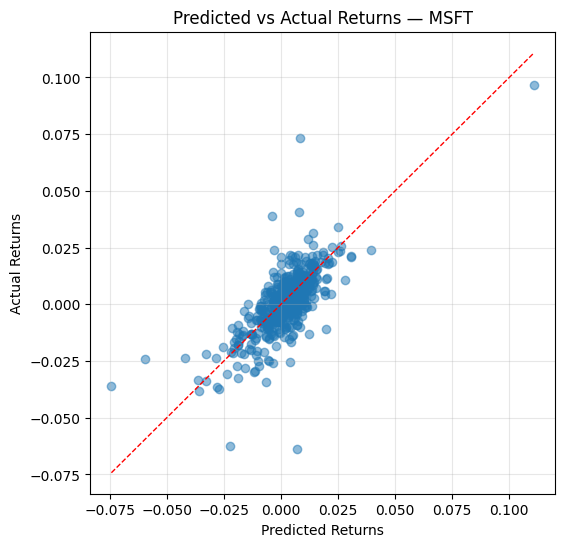

In [79]:
# %% [markdown]
# ## Predicted vs Actual Scatter Plots (Out-of-Sample) — All Tickers

for ticker in tickers:
    plt.figure(figsize=(6,6))

    plt.scatter(predicted_returns[ticker],
                actual_returns[ticker],
                alpha=0.5)

    plt.xlabel("Predicted Returns")
    plt.ylabel("Actual Returns")
    plt.title(f"Predicted vs Actual Returns — {ticker}")

    # Add a 45-degree reference line
    lims = [
        min(predicted_returns[ticker].min(), actual_returns[ticker].min()),
        max(predicted_returns[ticker].max(), actual_returns[ticker].max()),
    ]
    plt.plot(lims, lims, 'r--', linewidth=1)

    plt.grid(True, alpha=0.3)
    plt.show()


In [80]:
# %% [markdown]
# # Benchmark Models for Out-of-Sample Comparison

benchmark_results = []

for ticker in tickers:

    # Actual 2024+ excess returns
    actual = excess_assets_test[ticker]

    # CAPM predicted excess returns
    capm_pred = predicted_excess_returns[ticker]

    # Benchmark 1: Historical Mean
    hist_mean = excess_assets_train[ticker].mean()
    mean_pred = pd.Series(hist_mean, index=actual.index)

    # Benchmark 2: beta * market return
    beta = params_2015_2023[ticker]["beta"]
    beta_pred = beta * excess_mkt_test

    # Compute RMSE for all models
    rmse_capm = np.sqrt(np.mean((actual - capm_pred)**2))
    rmse_mean = np.sqrt(np.mean((actual - mean_pred)**2))
    rmse_beta = np.sqrt(np.mean((actual - beta_pred)**2))

    benchmark_results.append({
        "Ticker": ticker,
        "RMSE_CAPM": rmse_capm,
        "RMSE_Mean": rmse_mean,
        "RMSE_BetaOnly": rmse_beta
    })

benchmark_df = pd.DataFrame(benchmark_results).set_index("Ticker")
benchmark_df


RMSE_CAPM  RMSE_Mean  RMSE_BetaOnly
Ticker                                     
GOOG     0.015147   0.018889       0.015162
META     0.018220   0.023439       0.018224
NFLX     0.017793   0.020193       0.017804
AAPL     0.013013   0.017750       0.013000
MSFT     0.009953   0.014039       0.009919

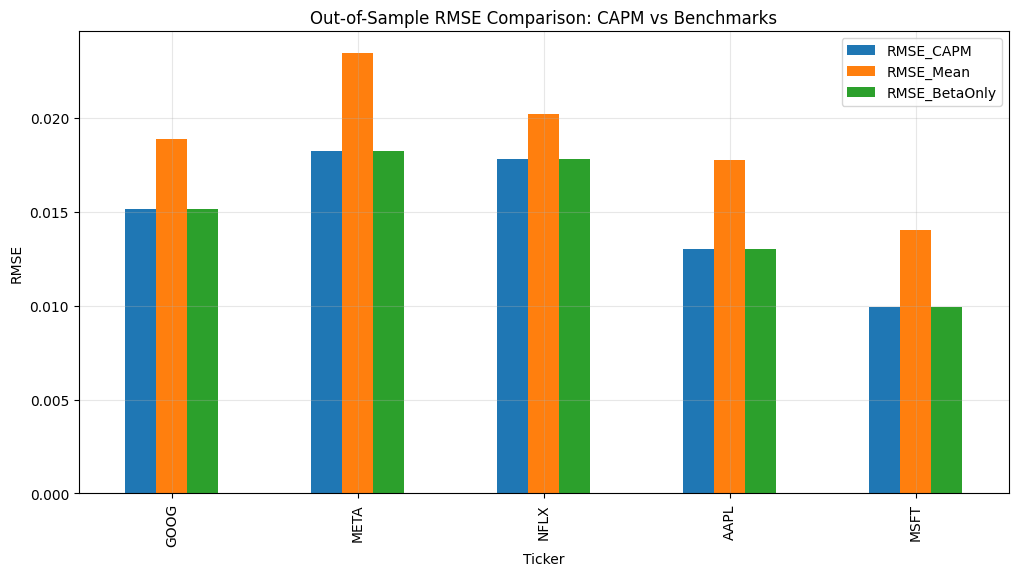

In [81]:
# %% [markdown]
# # Benchmark RMSE Comparison

benchmark_df.plot(kind="bar", figsize=(12,6))
plt.title("Out-of-Sample RMSE Comparison: CAPM vs Benchmarks")
plt.ylabel("RMSE")
plt.grid(True, alpha=0.3)
plt.show()


In [84]:
residual_std = {
    ticker: capm_models_2015_2023[ticker].resid.std()
    for ticker in tickers
}

params_2015_2023, residual_std
n_days = len(excess_mkt_test)   # out-of-sample horizon length
n_sims = 2000                   # number of Monte Carlo paths (tune as needed)

# Market distribution (from in-sample)
mu_m    = excess_mkt_train.mean()
sigma_m = excess_mkt_train.std()

# Simulate market excess returns: shape (n_days, n_sims)
simulated_mkt = np.random.normal(mu_m, sigma_m, size=(n_days, n_sims))

# Simulate stock excess returns per CAPM
simulated_stock_excess = {}

for ticker in tickers:
    a = params_2015_2023[ticker]["alpha"]
    b = params_2015_2023[ticker]["beta"]
    sigma_eps = residual_std[ticker]

    eps = np.random.normal(0, sigma_eps, size=(n_days, n_sims))
    simulated_stock_excess[ticker] = a + b * simulated_mkt + eps

# Convert to total (log) returns by adding rf_test
simulated_stock_total = {}

for ticker in tickers:
    # broadcast rf_test (n_days,) to (n_days, n_sims)
    rf_mat = np.repeat(rf_test.values.reshape(-1, 1), n_sims, axis=1)
    simulated_stock_total[ticker] = simulated_stock_excess[ticker] + rf_mat


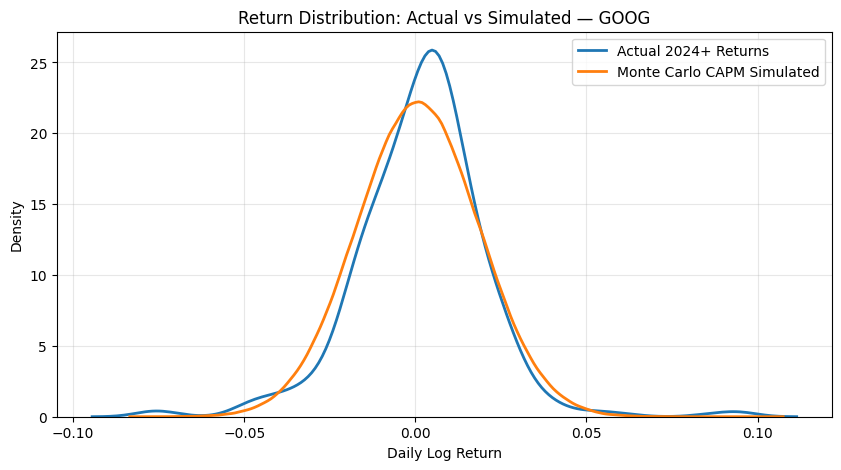

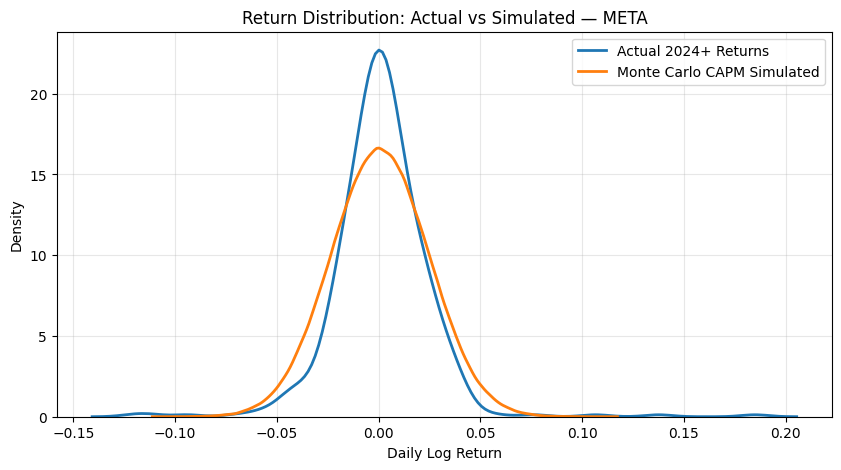

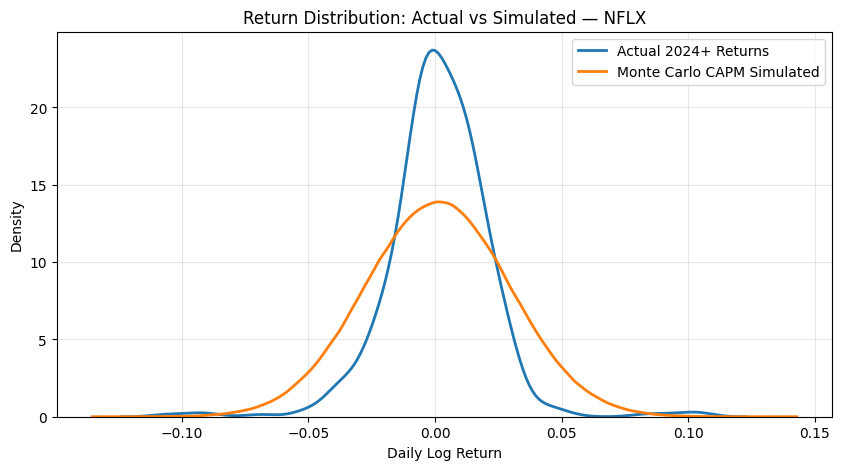

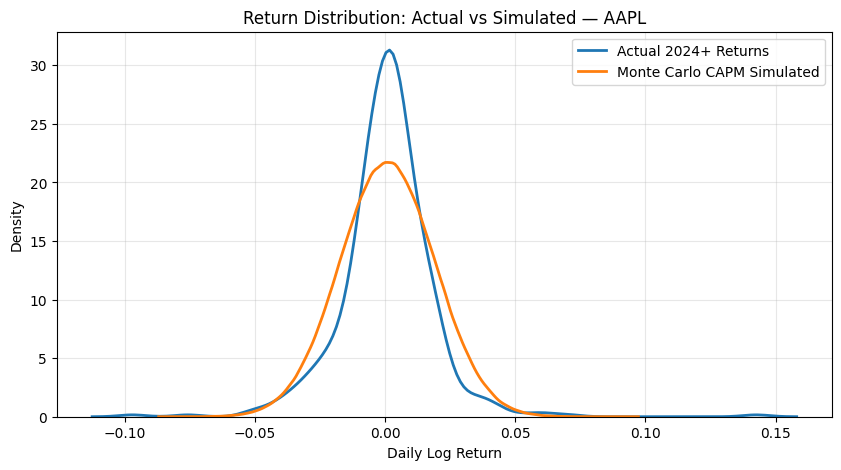

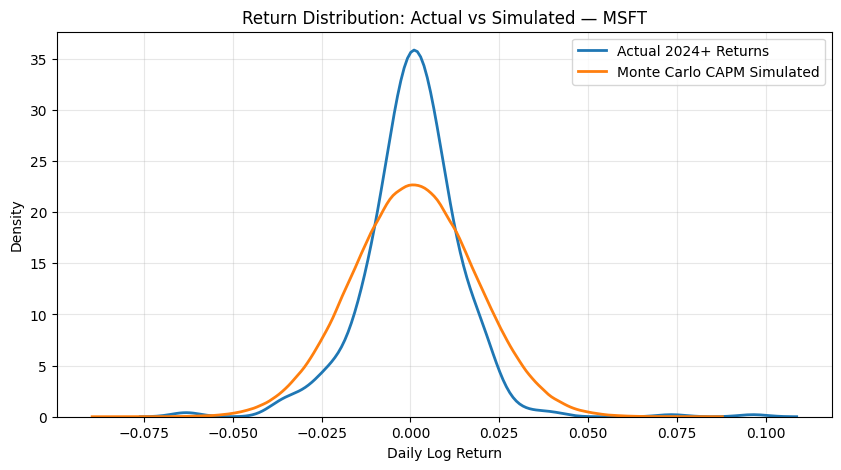

In [86]:
# %% [markdown]
# ## 4. Distribution Diagnostics: Actual vs Monte Carlo Simulated

# %%
import seaborn as sns
def plot_distribution_comparison(ticker):
    plt.figure(figsize=(10,5))
    sns.kdeplot(
        test_data[ticker].dropna(),
        label="Actual 2024+ Returns", linewidth=2
    )
    sns.kdeplot(
        simulated_stock_total[ticker].flatten(),
        label="Monte Carlo CAPM Simulated", linewidth=2
    )
    plt.title(f"Return Distribution: Actual vs Simulated — {ticker}")
    plt.xlabel("Daily Log Return")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

for ticker in tickers:
    plot_distribution_comparison(ticker)


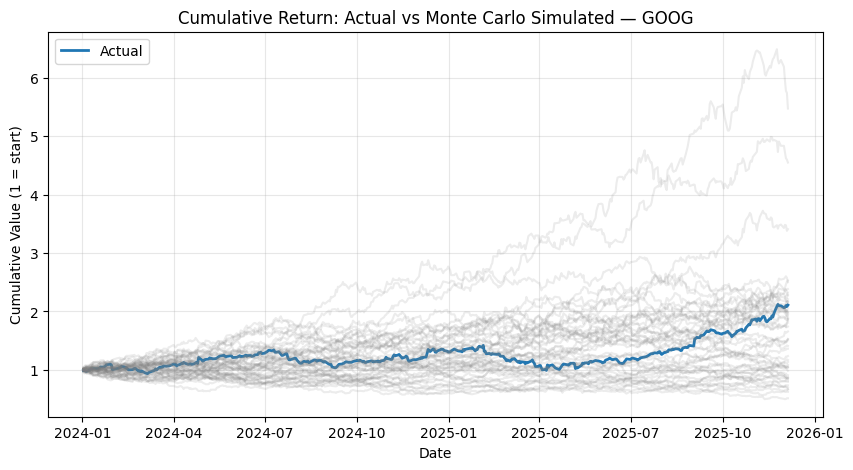

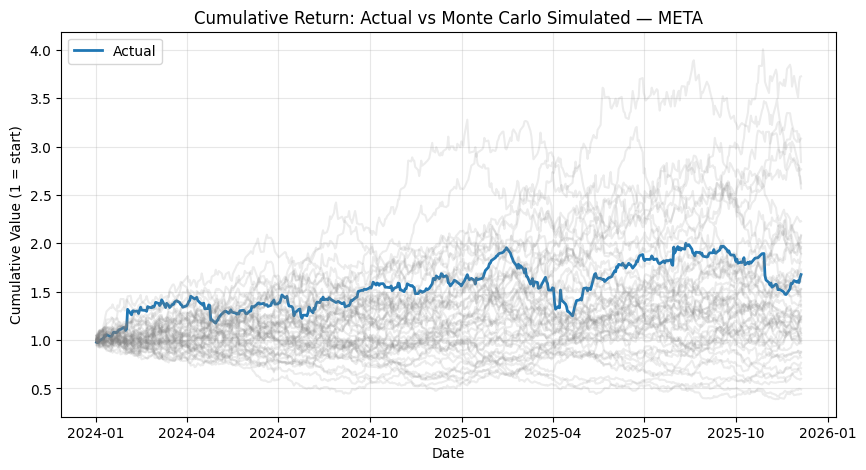

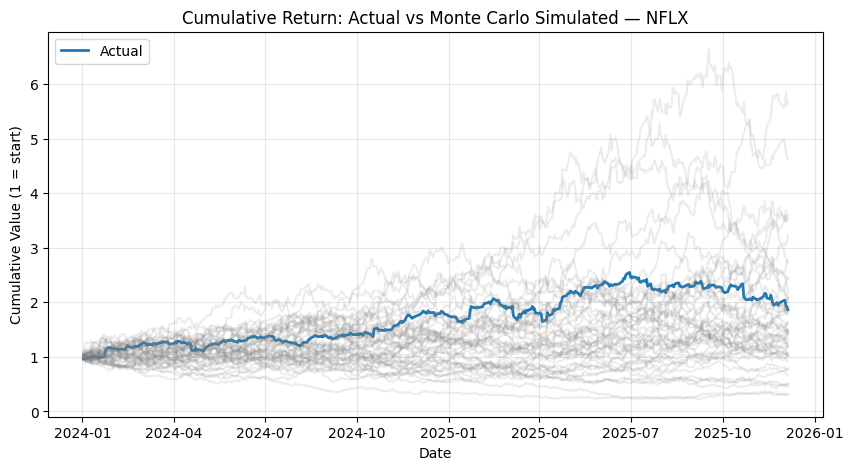

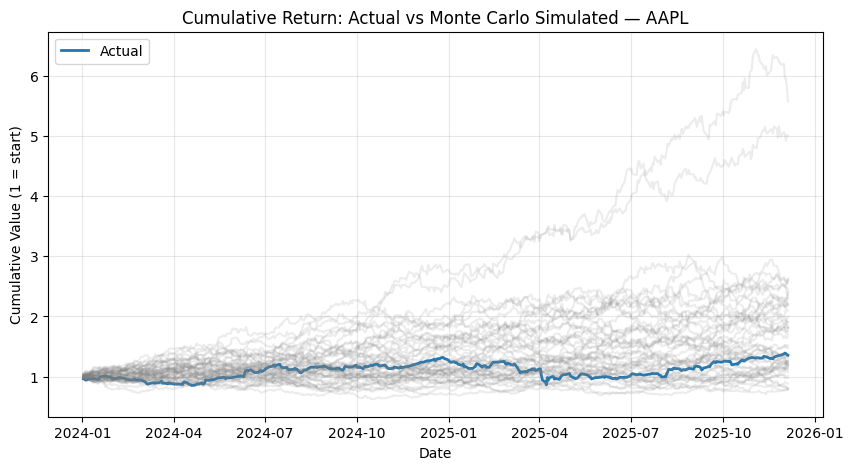

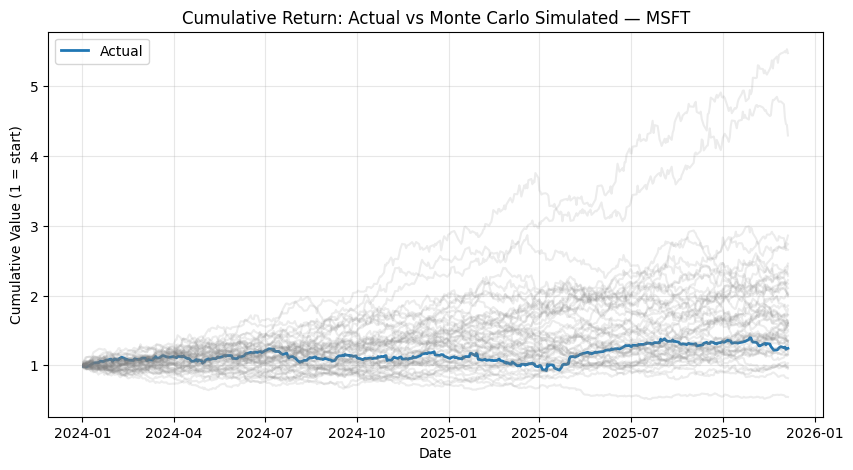

In [87]:
# %% [markdown]
# ## 4b. Cumulative Return Paths: Actual vs Simulated

# %%

def plot_cumulative_paths(ticker, n_plot_paths=50):
    plt.figure(figsize=(10,5))

    # Actual cumulative
    actual_cum = (1 + test_data[ticker]).cumprod()
    plt.plot(actual_cum.index, actual_cum.values, label="Actual", linewidth=2)

    # Simulated paths
    sim = simulated_stock_total[ticker]
    for i in range(min(n_plot_paths, n_sims)):
        sim_cum = (1 + sim[:, i]).cumprod()
        plt.plot(test_data.index, sim_cum, color="gray", alpha=0.15)

    plt.title(f"Cumulative Return: Actual vs Monte Carlo Simulated — {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Value (1 = start)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

for ticker in tickers:
    plot_cumulative_paths(ticker)


In [88]:
# %% [markdown]
# ## 5. Fit-for-Use Diagnostics: Moments & Coverage

# %%

diag_rows = []

for ticker in tickers:
    actual = test_data[ticker].dropna()

    sim = simulated_stock_total[ticker]  # shape (n_days, n_sims)
    sim_flat = sim.flatten()

    # Moments
    actual_mean = actual.mean()
    actual_std  = actual.std()

    sim_mean = sim_flat.mean()
    sim_std  = sim_flat.std()

    # Coverage: check if actual lies inside 95% band from simulation each day
    # For each day t, we compute 2.5 and 97.5 percentiles across sims
    lower = np.percentile(sim, 2.5, axis=1)
    upper = np.percentile(sim, 97.5, axis=1)

    # Align with actual index (test_data index)
    actual_vals = actual.values
    coverage_mask = (actual_vals >= lower) & (actual_vals <= upper)
    coverage_ratio = coverage_mask.mean()

    diag_rows.append({
        "Ticker": ticker,
        "Actual_Mean": actual_mean,
        "Sim_Mean": sim_mean,
        "Actual_Std": actual_std,
        "Sim_Std": sim_std,
        "95pct_Coverage": coverage_ratio
    })

mc_diag_df = pd.DataFrame(diag_rows).set_index("Ticker")
mc_diag_df


Actual_Mean  Sim_Mean  Actual_Std   Sim_Std  95pct_Coverage
Ticker                                                             
GOOG       0.001718  0.000733    0.018883  0.017979        0.936082
META       0.001339  0.000666    0.023454  0.024011        0.973196
NFLX       0.001489  0.000973    0.020208  0.028624        0.983505
AAPL       0.000783  0.000912    0.017768  0.018292        0.950515
MSFT       0.000547  0.000981    0.014046  0.017510        0.975258

In [89]:
# %% [markdown]
# ## 6. Monte Carlo VaR (1-Day and 10-Day) from CAPM Simulations

# %%

var_rows = []

for ticker in tickers:
    sim = simulated_stock_total[ticker]  # (n_days, n_sims)

    # 1-day distribution: just flatten all simulated daily returns
    one_day_returns = sim.flatten()

    VaR95_1d = -np.percentile(one_day_returns, 5)
    VaR99_1d = -np.percentile(one_day_returns, 1)

    # 10-day distribution: rolling 10-day sums on each path
    horizon = 10
    ten_day_sums = []
    for j in range(n_sims):
        path = sim[:, j]
        if len(path) >= horizon:
            # rolling window sum of returns (approx; could compound instead)
            sums = np.convolve(path, np.ones(horizon), mode="valid")
            ten_day_sums.extend(sums)

    ten_day_sums = np.array(ten_day_sums)
    VaR95_10d = -np.percentile(ten_day_sums, 5)
    VaR99_10d = -np.percentile(ten_day_sums, 1)

    var_rows.append({
        "Ticker": ticker,
        "VaR95_1d": VaR95_1d,
        "VaR99_1d": VaR99_1d,
        "VaR95_10d": VaR95_10d,
        "VaR99_10d": VaR99_10d
    })

mc_var_df = pd.DataFrame(var_rows).set_index("Ticker")
mc_var_df


VaR95_1d  VaR99_1d  VaR95_10d  VaR99_10d
Ticker                                          
GOOG    0.028836  0.041055   0.085858   0.124415
META    0.038803  0.055205   0.118197   0.170389
NFLX    0.046139  0.065615   0.139961   0.201851
AAPL    0.029207  0.041734   0.086145   0.125605
MSFT    0.027853  0.039741   0.081227   0.119427

In [91]:
# %% [markdown]
# ## 7. Fit-for-Use Diagnostic Report (Text Summary)

# %%

for ticker in tickers:
    row_diag = mc_diag_df.loc[ticker]
    row_var  = mc_var_df.loc[ticker]

    print(f"=== {ticker} ===")
    print(f"Actual mean (2024+): {row_diag['Actual_Mean']:.5f}")
    print(f"Simulated mean     : {row_diag['Sim_Mean']:.5f}")
    print(f"Actual std (2024+): {row_diag['Actual_Std']:.5f}")
    print(f"Simulated std     : {row_diag['Sim_Std']:.5f}")
    print(f"95% coverage (actual inside MC band): {row_diag['95pct_Coverage']:.3f}")
    print(f"VaR 95% 1-day : {row_var['VaR95_1d']:.4f}")
    print(f"VaR 99% 1-day : {row_var['VaR99_1d']:.4f}")
    print(f"VaR 95% 10-day: {row_var['VaR95_10d']:.4f}")
    print(f"VaR 99% 10-day: {row_var['VaR99_10d']:.4f}")

    # Simple flags
    if abs(row_diag["Actual_Std"] - row_diag["Sim_Std"]) > 0.005:
        print("Volatility mismatch: CAPM MC may under/over-estimate risk.")
    if row_diag["95pct_Coverage"] < 0.90 or row_diag["95pct_Coverage"] > 0.99:
        print("Predictive band coverage not close to 95% — calibration issue.")
    print()


=== GOOG ===
Actual mean (2024+): 0.00172
Simulated mean     : 0.00073
Actual std (2024+): 0.01888
Simulated std     : 0.01798
95% coverage (actual inside MC band): 0.936
VaR 95% 1-day : 0.0288
VaR 99% 1-day : 0.0411
VaR 95% 10-day: 0.0859
VaR 99% 10-day: 0.1244

=== META ===
Actual mean (2024+): 0.00134
Simulated mean     : 0.00067
Actual std (2024+): 0.02345
Simulated std     : 0.02401
95% coverage (actual inside MC band): 0.973
VaR 95% 1-day : 0.0388
VaR 99% 1-day : 0.0552
VaR 95% 10-day: 0.1182
VaR 99% 10-day: 0.1704

=== NFLX ===
Actual mean (2024+): 0.00149
Simulated mean     : 0.00097
Actual std (2024+): 0.02021
Simulated std     : 0.02862
95% coverage (actual inside MC band): 0.984
VaR 95% 1-day : 0.0461
VaR 99% 1-day : 0.0656
VaR 95% 10-day: 0.1400
VaR 99% 10-day: 0.2019
Volatility mismatch: CAPM MC may under/over-estimate risk.

=== AAPL ===
Actual mean (2024+): 0.00078
Simulated mean     : 0.00091
Actual std (2024+): 0.01777
Simulated std     : 0.01829
95% coverage (actual i

In [92]:
# %% [markdown]
# # Combined Model Ranking Table

model_rank_results = []

for ticker in tickers:
    actual = excess_assets_test[ticker]
    capm_pred = predicted_excess_returns[ticker]

    # Benchmark 1 — Historical Mean
    mean_pred = pd.Series(excess_assets_train[ticker].mean(), index=actual.index)

    # Benchmark 2 — Beta-only Model (alpha removed)
    beta = params_2015_2023[ticker]["beta"]
    beta_pred = beta * excess_mkt_test

    # Optional Benchmark 3 — Random Walk
    rw_pred = actual.shift(1).fillna(0)

    # RMSE calculations
    rmse_capm = np.sqrt(np.mean((actual - capm_pred)**2))
    rmse_mean = np.sqrt(np.mean((actual - mean_pred)**2))
    rmse_beta = np.sqrt(np.mean((actual - beta_pred)**2))
    rmse_rw = np.sqrt(np.mean((actual - rw_pred)**2))

    model_rank_results.append({
        "Ticker": ticker,
        "RMSE_CAPM": rmse_capm,
        "RMSE_Mean": rmse_mean,
        "RMSE_BetaOnly": rmse_beta,
        "RMSE_RandomWalk": rmse_rw
    })

model_rank_df = pd.DataFrame(model_rank_results).set_index("Ticker")
model_rank_df


RMSE_CAPM  RMSE_Mean  RMSE_BetaOnly  RMSE_RandomWalk
Ticker                                                      
GOOG     0.015147   0.018889       0.015162         0.026820
META     0.018220   0.023439       0.018224         0.034134
NFLX     0.017793   0.020193       0.017804         0.028513
AAPL     0.013013   0.017750       0.013000         0.024383
MSFT     0.009953   0.014039       0.009919         0.019979

In [93]:
# Rank models from lowest RMSE to highest (1 = best)
ranking_df = model_rank_df.rank(axis=1, method="dense")

ranking_df.columns = [col.replace("RMSE_", "Rank_") for col in ranking_df.columns]
ranking_df
combined_ranking_df = pd.concat([model_rank_df, ranking_df], axis=1)
combined_ranking_df


RMSE_CAPM  RMSE_Mean  RMSE_BetaOnly  RMSE_RandomWalk  Rank_CAPM  \
Ticker                                                                    
GOOG     0.015147   0.018889       0.015162         0.026820        1.0   
META     0.018220   0.023439       0.018224         0.034134        1.0   
NFLX     0.017793   0.020193       0.017804         0.028513        1.0   
AAPL     0.013013   0.017750       0.013000         0.024383        2.0   
MSFT     0.009953   0.014039       0.009919         0.019979        2.0   

        Rank_Mean  Rank_BetaOnly  Rank_RandomWalk  
Ticker                                             
GOOG          3.0            2.0              4.0  
META          3.0            2.0              4.0  
NFLX          3.0            2.0              4.0  
AAPL          3.0            1.0              4.0  
MSFT          3.0            1.0              4.0

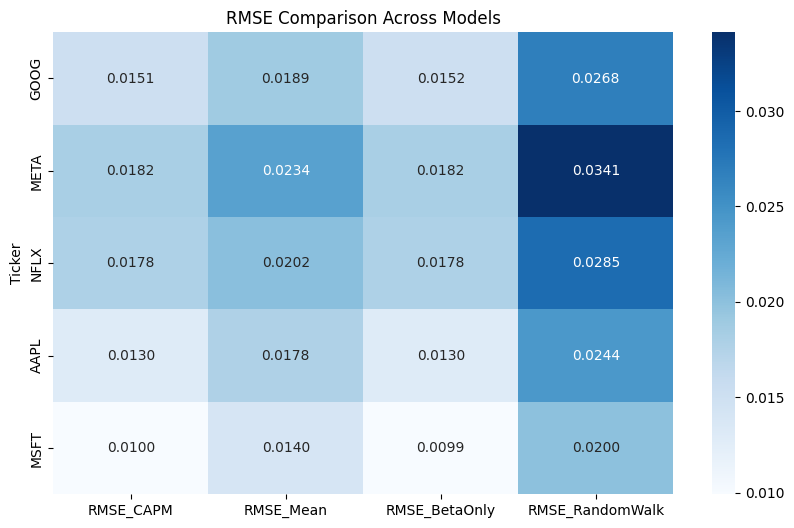

In [94]:
plt.figure(figsize=(10,6))
sns.heatmap(model_rank_df, annot=True, cmap="Blues", fmt=".4f")
plt.title("RMSE Comparison Across Models")
plt.show()


In [96]:
# %% [markdown]
# # Model Scoring System

model_scores = []

for ticker in tickers:
    actual = excess_assets_test[ticker]
    capm_pred = predicted_excess_returns[ticker]

    # Benchmarks
    mean_pred = pd.Series(excess_assets_train[ticker].mean(), index=actual.index)
    beta_pred = params_2015_2023[ticker]["beta"] * excess_mkt_test
    rw_pred = actual.shift(1).fillna(0)

    # RMSE
    RMSE = {
        "CAPM": np.sqrt(np.mean((actual - capm_pred)**2)),
        "Mean": np.sqrt(np.mean((actual - mean_pred)**2)),
        "BetaOnly": np.sqrt(np.mean((actual - beta_pred)**2)),
        "RandomWalk": np.sqrt(np.mean((actual - rw_pred)**2))
    }

    # Correlation
    correlation = {
        "CAPM": np.corrcoef(actual, capm_pred)[0,1],
        "Mean": np.corrcoef(actual, mean_pred)[0,1] if actual.std() > 0 else 0,
        "BetaOnly": np.corrcoef(actual, beta_pred)[0,1],
        "RandomWalk": np.corrcoef(actual, rw_pred)[0,1]
    }

    # Stability penalty
    penalty = {
        "CAPM": 0.90,
        "Mean": 1.05,
        "BetaOnly": 1.00,
        "RandomWalk": 0.80
    }

    # Final score calculation
    for model in RMSE.keys():
        rmse_score = 1 / (1 + RMSE[model])
        corr_score = (1 + correlation[model]) / 2
        combined = 0.5 * rmse_score + 0.5 * corr_score

        final_score = combined * penalty[model]

        model_scores.append({
            "Ticker": ticker,
            "Model": model,
            "RMSE": RMSE[model],
            "Correlation": correlation[model],
            "Final_Score": final_score
        })

model_scores_df = pd.DataFrame(model_scores)
model_scores_df


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Ticker       Model      RMSE   Correlation  Final_Score
0    GOOG        CAPM  0.015147  5.969168e-01     0.802592
1    GOOG        Mean  0.018889  5.005671e-17     0.777767
2    GOOG    BetaOnly  0.015162  5.969168e-01     0.891761
3    GOOG  RandomWalk  0.026820 -1.096079e-02     0.587360
4    META        CAPM  0.018220  6.351938e-01     0.809866
5    META        Mean  0.023439           NaN          NaN
6    META    BetaOnly  0.018224  6.351938e-01     0.899850
7    META  RandomWalk  0.034134 -6.177850e-02     0.574441
8    NFLX        CAPM  0.017793  4.836180e-01     0.775947
9    NFLX        Mean  0.020193 -1.133953e-17     0.777109
10   NFLX    BetaOnly  0.017804  4.836180e-01     0.862158
11   NFLX  RandomWalk  0.028513  8.391209e-05     0.588928
12   AAPL        CAPM  0.013013  6.808764e-01     0.822416
13   AAPL        Mean  0.017750 -9.672570e-18     0.778344
14   AAPL    BetaOnly  0.013000  6.808764e-01     0.913802
15   AAPL  RandomWalk  0.024383  5.629530e-02     0.601738
16   MSFT        CAPM  0.009953  7.239467e-01     0.833453
17   MSFT        Mean  0.014039 -1.631367e-17     0.780232
18   MSFT    BetaOnly  0.009919  7.239467e-01     0.926076
19   MSFT  RandomWalk  0.019979 -1.378128e-02     0.589409

In [97]:
ranking_scores = model_scores_df.pivot(index="Ticker", columns="Model", values="Final_Score")
ranking_scores["Best_Model"] = ranking_scores.idxmax(axis=1)
ranking_scores


Model   BetaOnly      CAPM      Mean  RandomWalk Best_Model
Ticker                                                     
AAPL    0.913802  0.822416  0.778344    0.601738   BetaOnly
GOOG    0.891761  0.802592  0.777767    0.587360   BetaOnly
META    0.899850  0.809866       NaN    0.574441   BetaOnly
MSFT    0.926076  0.833453  0.780232    0.589409   BetaOnly
NFLX    0.862158  0.775947  0.777109    0.588928   BetaOnly